#Part5_Ch3_후보물질 가상 스크리닝

SEIHWAN 2025

In [ ]:
!pip install -q numpy==2.0.2
!pip install -q rdkit>=2023.9.6 molvs pillow pandas matplotlib seaborn scikit-learn scipy networkx
!pip install -q pillow

 # 1. 키나아제 저해제 발굴

키나아제 저해제 발굴을 위한 가상 스크리닝 프로젝트

[타겟 정보]
name: EGFR (Epidermal Growth Factor Receptor)
uniprot_id: P00533
pdb_id: 4ZAU
disease_relevance: Non-small cell lung cancer, Colorectal cancer, Glioblastoma
existing_inhibitors: Gefitinib, Erlotinib, Osimertinib, Afatinib

[기존 키나아제 저해제 구조]


[16:09:30] Explicit valence for atom # 8 C, 5, is greater than permitted


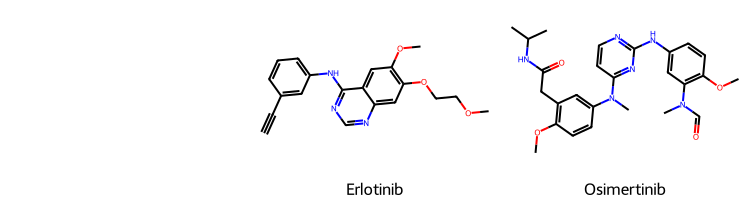

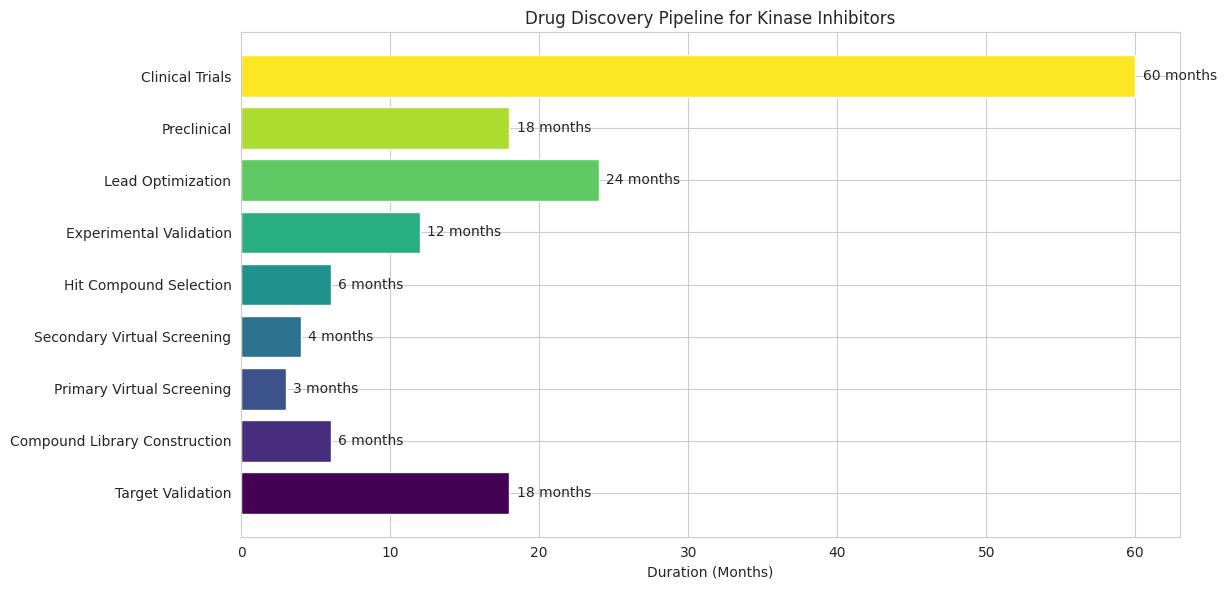

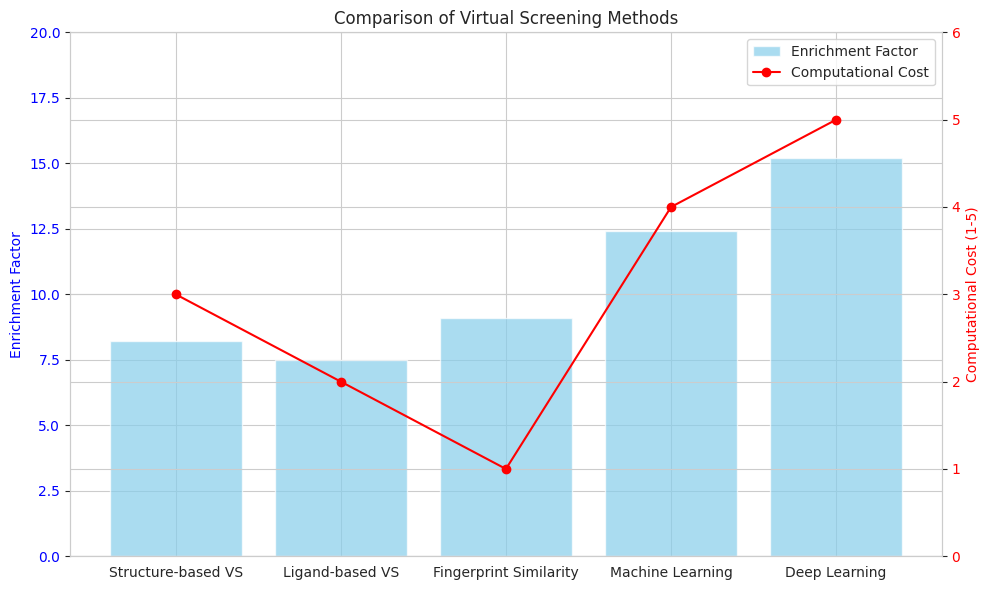

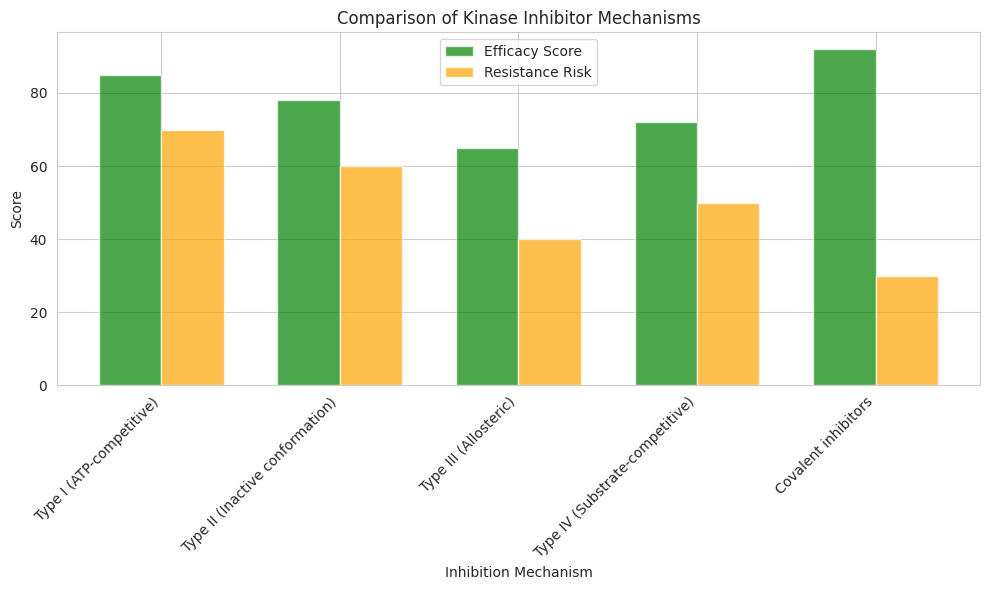


[키나아제 저해제 발굴을 위한 가상 스크리닝 프로젝트 개요]
1. 타겟 선정: EGFR 키나아제
2. 화합물 라이브러리 구축: 상용 및 자체 합성 라이브러리 활용
3. 1차 스크리닝: 분자 도킹 및 약물성 필터링
4. 2차 스크리닝: 분자동역학 시뮬레이션 및 결합 자유 에너지 계산
5. Hit 화합물 선정: 결합 에너지, 선택성, 약물성 종합 평가
6. 실험적 검증: in vitro 효소 활성 및 세포 기반 효능 평가


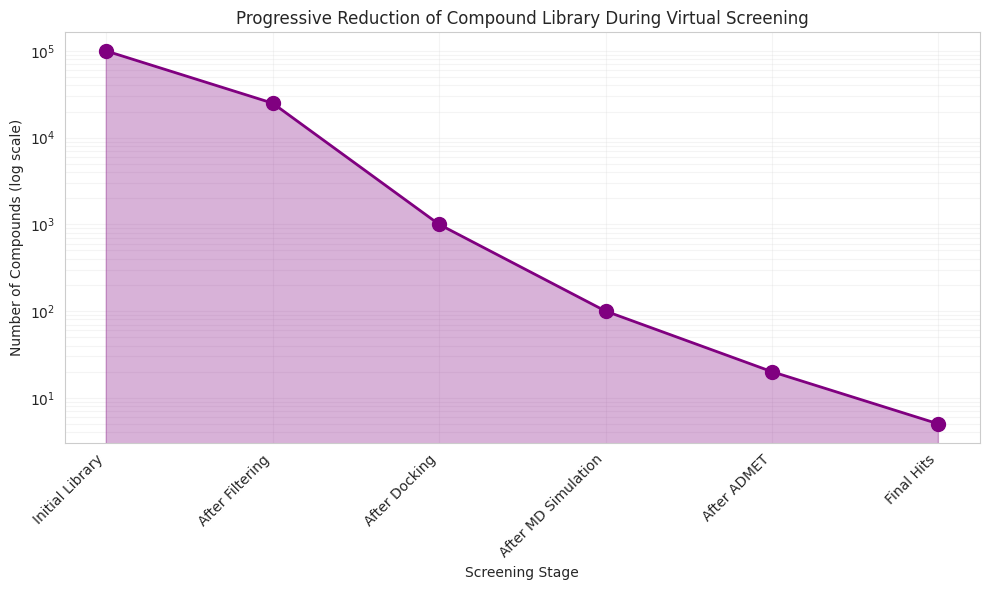


[다음 실습 시나리오]
시나리오 02: 가상 스크리닝을 위한 화합물 라이브러리 구축 방법 학습


In [ ]:
# 후보물질 가상 스크리닝 시나리오 01: 키나아제 저해제 발굴
# 필요한 라이브러리 설치
!pip install -q rdkit-pypi==2022.9.5 molvs pillow numpy pandas matplotlib seaborn scikit-learn scipy networkx

# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors, Lipinski
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위한 스타일 설정
sns.set_style('whitegrid')

print("="*50)
print("키나아제 저해제 발굴을 위한 가상 스크리닝 프로젝트")
print("="*50)

# 키나아제 타겟 정보
target_info = {
    'name': 'EGFR (Epidermal Growth Factor Receptor)',
    'uniprot_id': 'P00533',
    'pdb_id': '4ZAU',
    'disease_relevance': ['Non-small cell lung cancer', 'Colorectal cancer', 'Glioblastoma'],
    'existing_inhibitors': ['Gefitinib', 'Erlotinib', 'Osimertinib', 'Afatinib']
}

# 타겟 정보 출력
print("\n[타겟 정보]")
for key, value in target_info.items():
    if isinstance(value, list):
        print(f"{key}: {', '.join(value)}")
    else:
        print(f"{key}: {value}")

# 기존 키나아제 저해제 구조 시각화
known_inhibitors = {
    'Gefitinib': 'CNC1=CC(=CC=C1)C2=C3C=CNC=3N=CN=2NC4=CC(=C(C=C4)Cl)F',
    'Erlotinib': 'COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC',
    'Osimertinib': 'COC1=C(C=C(C=C1)N(C2=NC(=NC=C2)NC3=CC(=C(C=C3)OC)N(C=O)C)C)CC(=O)NC(C)C'
}

# SMILES에서 분자 생성
molecules = {name: Chem.MolFromSmiles(smiles) for name, smiles in known_inhibitors.items()}

# 분자 시각화
print("\n[기존 키나아제 저해제 구조]")
img = Draw.MolsToGridImage(list(molecules.values()),
                          molsPerRow=3,
                          subImgSize=(250, 200),
                          legends=list(molecules.keys()))
display(img)

# 약물 개발 파이프라인 단계 시각화
pipeline_stages = ['Target Validation', 'Compound Library Construction', 'Primary Virtual Screening',
                   'Secondary Virtual Screening', 'Hit Compound Selection', 'Experimental Validation',
                   'Lead Optimization', 'Preclinical', 'Clinical Trials']

# 실제 약물 개발 단계별 소요 기간(월)
pipeline_durations = [18, 6, 3, 4, 6, 12, 24, 18, 60]  # 단계별 소요 기간(월)

# 파이프라인 단계 시각화
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(pipeline_stages)))
bars = plt.barh(pipeline_stages, pipeline_durations, color=colors)
plt.xlabel('Duration (Months)')
plt.title('Drug Discovery Pipeline for Kinase Inhibitors')
plt.tight_layout()

# 막대 끝에 소요 기간 표시
for bar, duration in zip(bars, pipeline_durations):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{duration} months', ha='left', va='center')

plt.show()

# 가상 스크리닝 성능 비교 데이터
screening_methods = ['Structure-based VS', 'Ligand-based VS', 'Fingerprint Similarity',
                    'Machine Learning', 'Deep Learning']
enrichment_factors = [8.2, 7.5, 9.1, 12.4, 15.2]
computational_cost = [3, 2, 1, 4, 5]  # 1-5 scale

# 가상 스크리닝 방법 비교 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프: Enrichment Factors
ax1.bar(screening_methods, enrichment_factors, alpha=0.7, color='skyblue', label='Enrichment Factor')
ax1.set_ylabel('Enrichment Factor', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 20)

# 두 번째 y축: 계산 비용
ax2 = ax1.twinx()
ax2.plot(screening_methods, computational_cost, 'o-', color='red', label='Computational Cost')
ax2.set_ylabel('Computational Cost (1-5)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 6)

plt.title('Comparison of Virtual Screening Methods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 두 축에 대한 범례 결합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

# 키나아제 저해제 작용 메커니즘 시각화 (간략화된 그림)
mechanisms = ['Type I (ATP-competitive)', 'Type II (Inactive conformation)',
              'Type III (Allosteric)', 'Type IV (Substrate-competitive)',
              'Covalent inhibitors']

efficacy = [85, 78, 65, 72, 92]  # 효능 점수
resistance_development = [70, 60, 40, 50, 30]  # 내성 발생 가능성

plt.figure(figsize=(10, 6))
x = np.arange(len(mechanisms))
width = 0.35

plt.bar(x - width/2, efficacy, width, label='Efficacy Score', color='green', alpha=0.7)
plt.bar(x + width/2, resistance_development, width, label='Resistance Risk', color='orange', alpha=0.7)

plt.xlabel('Inhibition Mechanism')
plt.ylabel('Score')
plt.title('Comparison of Kinase Inhibitor Mechanisms')
plt.xticks(x, mechanisms, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print("\n[키나아제 저해제 발굴을 위한 가상 스크리닝 프로젝트 개요]")
print("1. 타겟 선정: EGFR 키나아제")
print("2. 화합물 라이브러리 구축: 상용 및 자체 합성 라이브러리 활용")
print("3. 1차 스크리닝: 분자 도킹 및 약물성 필터링")
print("4. 2차 스크리닝: 분자동역학 시뮬레이션 및 결합 자유 에너지 계산")
print("5. Hit 화합물 선정: 결합 에너지, 선택성, 약물성 종합 평가")
print("6. 실험적 검증: in vitro 효소 활성 및 세포 기반 효능 평가")

# 가상 스크리닝을 통한 화합물 라이브러리 축소 과정 시각화
screening_steps = ['Initial Library', 'After Filtering', 'After Docking',
                  'After MD Simulation', 'After ADMET', 'Final Hits']
compound_numbers = [100000, 25000, 1000, 100, 20, 5]

plt.figure(figsize=(10, 6))
plt.plot(screening_steps, compound_numbers, 'o-', linewidth=2, markersize=10, color='purple')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.fill_between(screening_steps, compound_numbers, alpha=0.3, color='purple')
plt.xlabel('Screening Stage')
plt.ylabel('Number of Compounds (log scale)')
plt.title('Progressive Reduction of Compound Library During Virtual Screening')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n[다음 실습 시나리오]")
print("시나리오 02: 가상 스크리닝을 위한 화합물 라이브러리 구축 방법 학습")

#2.  화합물 라이브러리 구축

가상 스크리닝을 위한 화합물 라이브러리 구축


[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 mark


생성된 화합물 라이브러리 크기: 1000개 화합물

샘플 데이터:


[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 marked aromatic
[16:09:40] non-ring atom 11 mark

,Compound_ID,SMILES
0,CPND-00001,c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3
1,CPND-00002,c1c(c(=O)c2ccccc2o1)cc.SCH3.NO2.Br
2,CPND-00003,c1nc(nc2c1ncn2C)N
3,CPND-00004,c1nc(nc2c1ncn2C)N.F.NO2.O
4,CPND-00005,c1ccc(cc1)Nc2ncnc3cc(ccc23)OC.I.C.SO2NH2


[16:09:40] SMILES Parse Error: syntax error while parsing: c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3
[16:09:40] SMILES Parse Error: Failed parsing SMILES 'c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3' for input: 'c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3'
[16:09:40] SMILES Parse Error: syntax error while parsing: c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3
[16:09:40] SMILES Parse Error: Failed parsing SMILES 'c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3' for input: 'c1nc(nc2c1ncn2C)N.SO2NH2.Br.CCl3'
[16:09:40] SMILES Parse Error: syntax error while parsing: c1c(c(=O)c2ccccc2o1)cc.SCH3.NO2.Br
[16:09:40] SMILES Parse Error: Failed parsing SMILES 'c1c(c(=O)c2ccccc2o1)cc.SCH3.NO2.Br' for input: 'c1c(c(=O)c2ccccc2o1)cc.SCH3.NO2.Br'
[16:09:40] SMILES Parse Error: unclosed ring for input: 'c1nc(nc2c1ncn2C)N.F.NO2.O'
[16:09:40] SMILES Parse Error: syntax error while parsing: c1ccc(cc1)Nc2ncnc3cc(ccc23)OC.I.C.SO2NH2
[16:09:40] SMILES Parse Error: Failed parsing SMILES 'c1ccc(cc1)Nc2ncnc3cc(ccc23)OC.I.C.SO2NH2' for input: 'c1ccc(cc1)Nc2ncnc3cc(ccc


표준화 후 화합물 라이브러리 크기: 146개 화합물

분자 특성이 계산된 화합물 정보:


,Compound_ID,MW,LogP,HBD,HBA,RotBonds,TPSA,Lipinski_Violations
0,CPND-00003,149.157,-0.05450,1,5,0,69.62,0
1,CPND-00007,159.192,1.52042,1,3,0,51.80,0
2,CPND-00019,228.255,1.50630,3,4,3,94.03,0
3,CPND-00024,175.235,2.15652,1,3,0,51.80,0
4,CPND-00025,264.716,1.92810,3,4,3,94.03,0


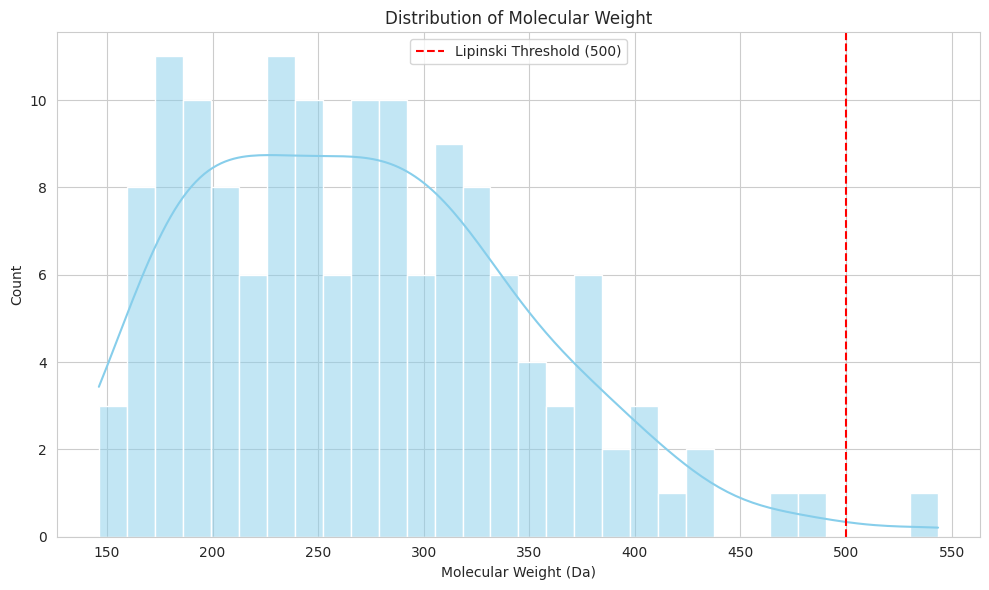

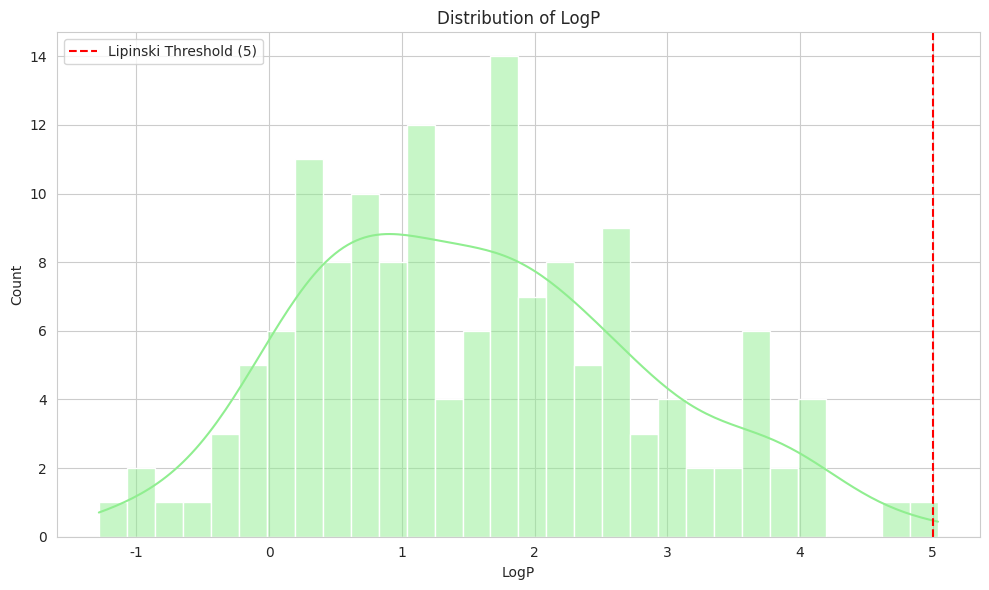

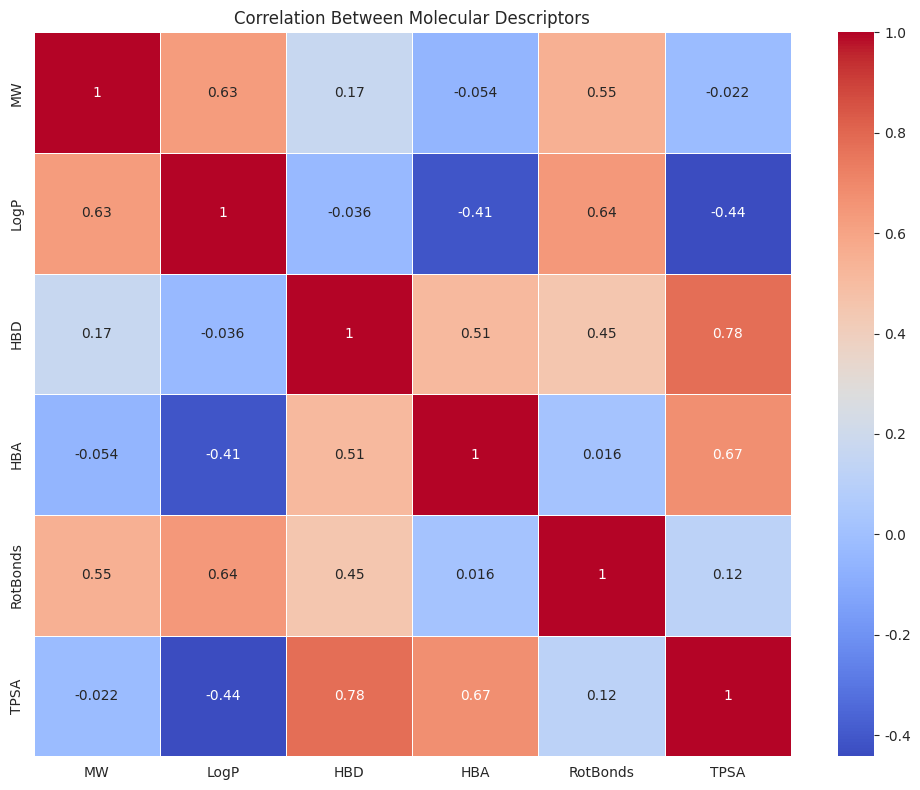

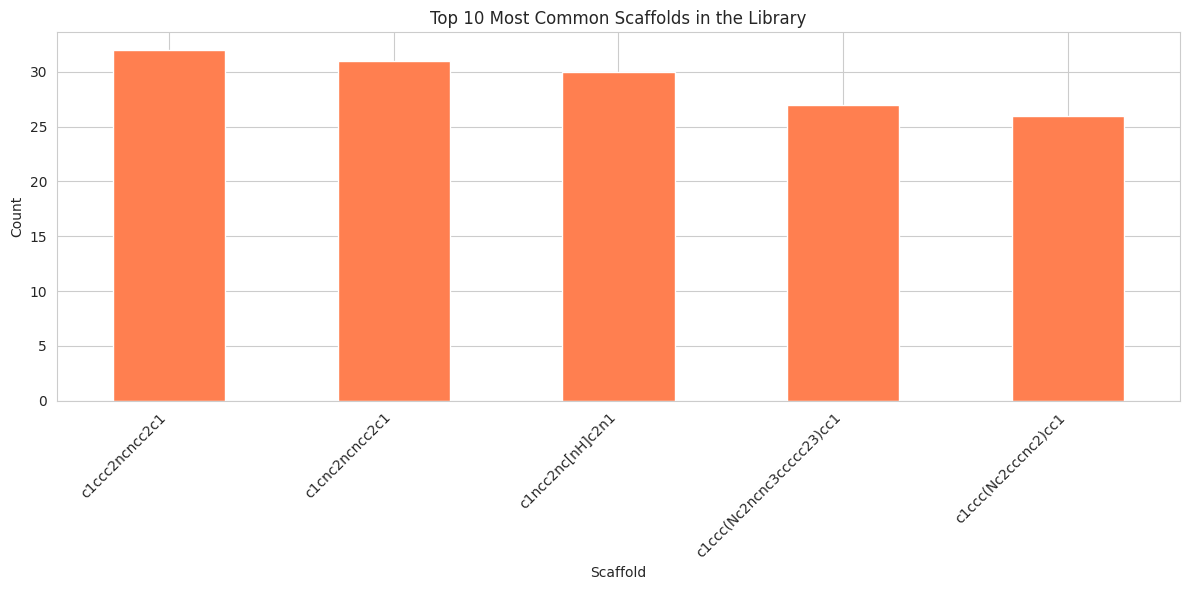

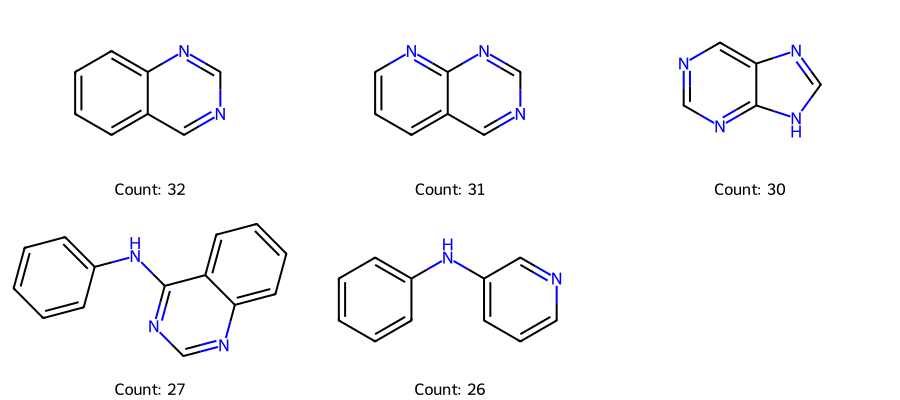


필터링 후 라이브러리 크기: 90개 화합물 (전체의 61.6%)


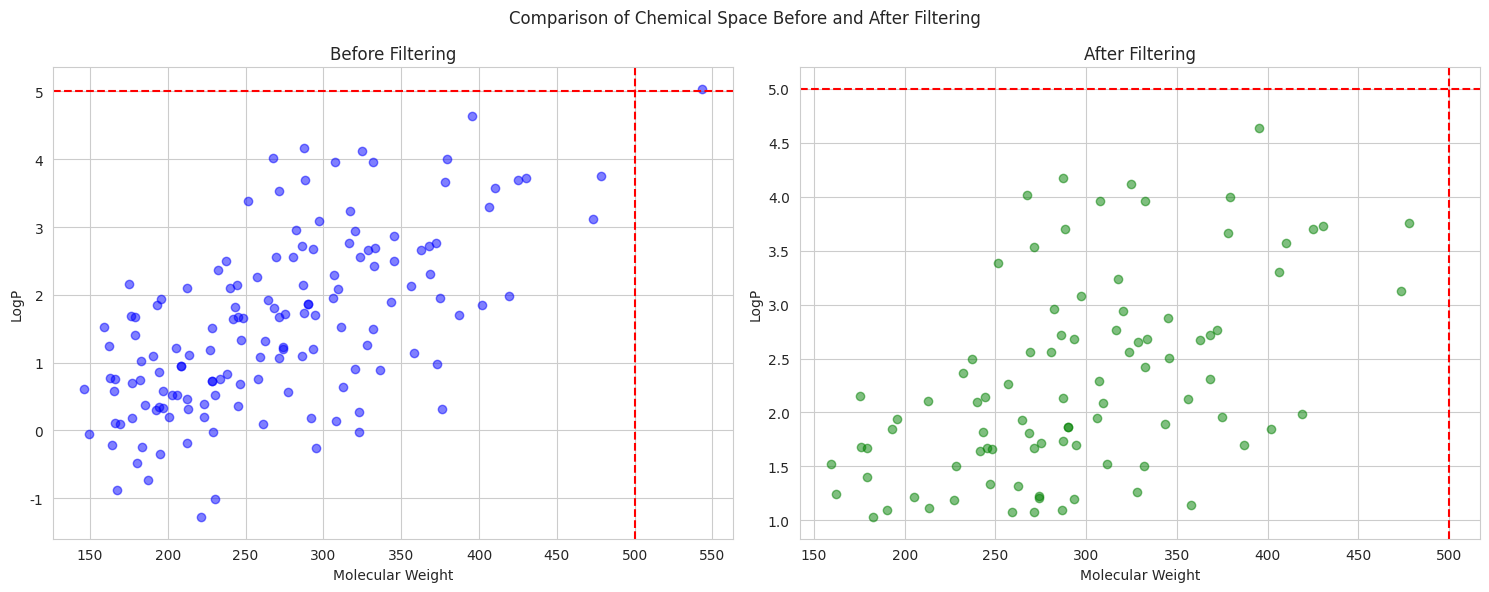

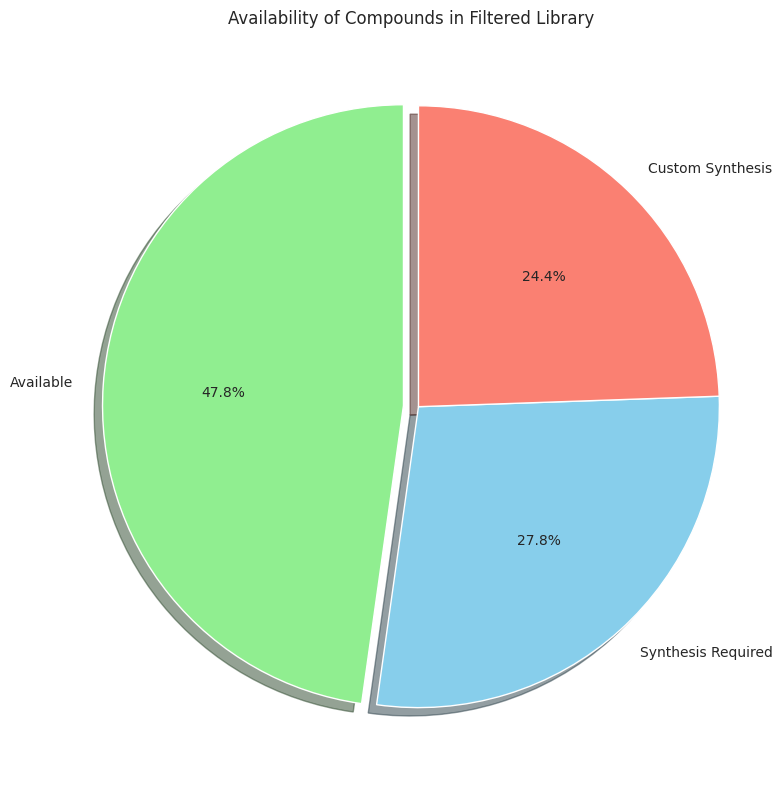

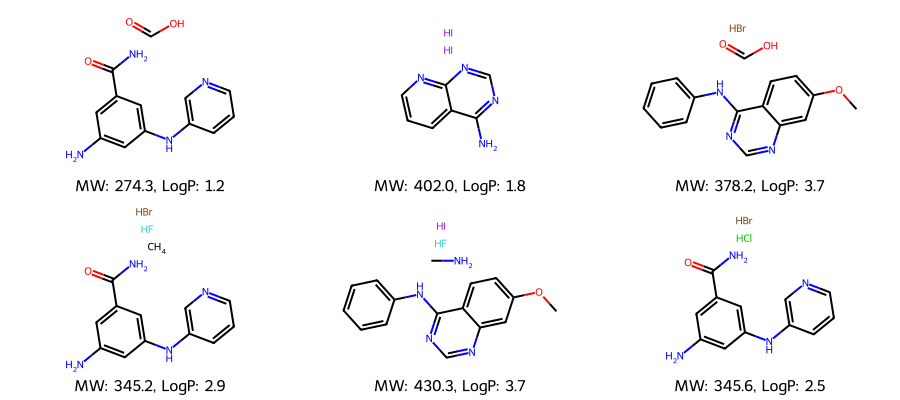


[화합물 라이브러리 구축 요약]
1. 초기 라이브러리 크기: 1000개 화합물
2. 표준화 및 정제 후: 146개 화합물
3. 키나아제 친화적 필터링 후: 90개 화합물
4. 다양한 스캐폴드 수: 5개
5. 구매 가능한 화합물 비율: 47.8%

[다음 실습 시나리오]
시나리오 03: 효율적인 가상 스크리닝 파이프라인 구축 방법 학습


In [ ]:
# 후보물질 가상 스크리닝 시나리오 02: 화합물 라이브러리 구축
# 필요한 라이브러리 설치
!pip install -q rdkit-pypi==2022.9.5 molvs pillow numpy pandas matplotlib seaborn scikit-learn scipy networkx

# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors, Lipinski, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
from molvs import standardize_smiles
import random
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위한 스타일 설정
sns.set_style('whitegrid')

print("="*50)
print("가상 스크리닝을 위한 화합물 라이브러리 구축")
print("="*50)

# 1. 샘플 화합물 라이브러리 생성 (실제로는 외부 데이터베이스나 파일에서 로드)
def generate_sample_library(n_compounds=1000):
    """샘플 화합물 라이브러리 생성 함수"""
    # 키나아제 저해제 관련 기본 스캐폴드 정의
    scaffolds = [
        'c1ccc(cc1)Nc2ncnc3cc(ccc23)OC',  # Gefitinib/Erlotinib 계열
        'c1cc(cnc1)Nc2cc(cc(c2)N)C(=O)N',  # Imatinib 계열
        'c1c(c(=O)c2ccccc2o1)cc',          # 플라본 계열
        'c1nc(nc2c1ncn2C)N',                # 퓨린 계열
        'c1cnc2c(c1)c(ncn2)N',             # 아데닌 계열
        'c1ccc2c(c1)c(nc(n2)N)C'           # 퀴나졸린 계열
    ]

    # R-그룹 변형을 위한 작용기
    functional_groups = [
        'F', 'Cl', 'Br', 'I', 'O', 'N', 'C', 'CF3', 'CCl3', 'CN', 'NO2',
        'OCH3', 'NH2', 'C(=O)O', 'C(=O)NH2', 'SO2NH2', 'SCH3'
    ]

    # 화합물 라이브러리 생성
    compounds = []
    compound_ids = []
    for i in range(n_compounds):
        # 무작위로 스캐폴드 선택
        scaffold = random.choice(scaffolds)
        mol = Chem.MolFromSmiles(scaffold)

        # 무작위로 작용기 추가 (실제로는 더 복잡한 방식 사용)
        # 여기서는 간단한 시뮬레이션만 수행
        n_modifications = random.randint(0, 3)
        modified_smiles = scaffold

        for _ in range(n_modifications):
            # 간단히 작용기 추가로 시뮬레이션
            modified_smiles += "." + random.choice(functional_groups)

        # 화합물 ID 생성
        compound_id = f"CPND-{i+1:05d}"

        compounds.append(modified_smiles)
        compound_ids.append(compound_id)

    # 데이터프레임 생성
    df = pd.DataFrame({
        'Compound_ID': compound_ids,
        'SMILES': compounds
    })

    return df

# 샘플 화합물 라이브러리 생성
compound_library = generate_sample_library(1000)
print(f"\n생성된 화합물 라이브러리 크기: {len(compound_library)}개 화합물")
print("\n샘플 데이터:")
display(compound_library.head())

# 2. 화합물 표준화 및 정제
def standardize_compounds(df):
    """화합물 표준화 및 정제 함수"""
    # SMILES 문자열 표준화
    try:
        df['Standardized_SMILES'] = df['SMILES'].apply(lambda x: standardize_smiles(x))
    except:
        # 라이브러리가 불안정한 경우를 대비한 대체 코드
        df['Standardized_SMILES'] = df['SMILES'].copy()

    # RDKit 분자 객체 생성
    df['ROMol'] = df['Standardized_SMILES'].apply(lambda x: Chem.MolFromSmiles(x) if pd.notnull(x) else None)

    # 유효하지 않은 분자 필터링
    df = df[df['ROMol'].notnull()].reset_index(drop=True)

    # 중복 제거 (동일한 표준화 SMILES)
    df = df.drop_duplicates(subset=['Standardized_SMILES']).reset_index(drop=True)

    return df

# 화합물 표준화 및 정제
standardized_library = standardize_compounds(compound_library)
print(f"\n표준화 후 화합물 라이브러리 크기: {len(standardized_library)}개 화합물")

# 3. 화합물 특성 계산
def calculate_descriptors(df):
    """화합물 분자 특성 계산 함수"""
    # 분자량
    df['MW'] = df['ROMol'].apply(lambda x: Descriptors.MolWt(x) if x is not None else None)

    # LogP
    df['LogP'] = df['ROMol'].apply(lambda x: Descriptors.MolLogP(x) if x is not None else None)

    # 수소 결합 공여체 수
    df['HBD'] = df['ROMol'].apply(lambda x: Descriptors.NumHDonors(x) if x is not None else None)

    # 수소 결합 수용체 수
    df['HBA'] = df['ROMol'].apply(lambda x: Descriptors.NumHAcceptors(x) if x is not None else None)

    # 회전 가능한 결합 수
    df['RotBonds'] = df['ROMol'].apply(lambda x: Descriptors.NumRotatableBonds(x) if x is not None else None)

    # 극성 표면적
    df['TPSA'] = df['ROMol'].apply(lambda x: Descriptors.TPSA(x) if x is not None else None)

    # Lipinski 규칙 위반 수
    df['Lipinski_Violations'] = df['ROMol'].apply(
        lambda x: sum([
            Descriptors.MolWt(x) > 500,
            Descriptors.MolLogP(x) > 5,
            Descriptors.NumHDonors(x) > 5,
            Descriptors.NumHAcceptors(x) > 10
        ]) if x is not None else None
    )

    return df

# 분자 특성 계산
library_with_descriptors = calculate_descriptors(standardized_library)
print("\n분자 특성이 계산된 화합물 정보:")
display(library_with_descriptors[['Compound_ID', 'MW', 'LogP', 'HBD', 'HBA', 'RotBonds', 'TPSA', 'Lipinski_Violations']].head())

# 4. 약물성 분포 시각화
# 분자량 분포
plt.figure(figsize=(10, 6))
sns.histplot(library_with_descriptors['MW'], kde=True, bins=30, color='skyblue')
plt.axvline(x=500, color='red', linestyle='--', label='Lipinski Threshold (500)')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Count')
plt.title('Distribution of Molecular Weight')
plt.legend()
plt.tight_layout()
plt.show()

# LogP 분포
plt.figure(figsize=(10, 6))
sns.histplot(library_with_descriptors['LogP'], kde=True, bins=30, color='lightgreen')
plt.axvline(x=5, color='red', linestyle='--', label='Lipinski Threshold (5)')
plt.xlabel('LogP')
plt.ylabel('Count')
plt.title('Distribution of LogP')
plt.legend()
plt.tight_layout()
plt.show()

# 약물성 특성 간 상관관계
plt.figure(figsize=(10, 8))
descriptor_cols = ['MW', 'LogP', 'HBD', 'HBA', 'RotBonds', 'TPSA']
correlation = library_with_descriptors[descriptor_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Molecular Descriptors')
plt.tight_layout()
plt.show()

# 5. 화합물 구조 다양성 분석
def extract_scaffolds(df):
    """화합물에서 Murcko 스캐폴드 추출"""
    df['Scaffold_SMILES'] = df['ROMol'].apply(
        lambda x: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(x)) if x is not None else None
    )
    return df

# 스캐폴드 추출
library_with_scaffolds = extract_scaffolds(library_with_descriptors)

# 스캐폴드 분포 분석
scaffold_counts = library_with_scaffolds['Scaffold_SMILES'].value_counts()
top_scaffolds = scaffold_counts.head(10)

plt.figure(figsize=(12, 6))
top_scaffolds.plot(kind='bar', color='coral')
plt.xlabel('Scaffold')
plt.ylabel('Count')
plt.title('Top 10 Most Common Scaffolds in the Library')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 상위 5개 대표 스캐폴드 시각화
top_scaffold_smiles = top_scaffolds.index.tolist()[:5]
top_scaffold_mols = [Chem.MolFromSmiles(s) for s in top_scaffold_smiles]
scaffold_img = Draw.MolsToGridImage(
    top_scaffold_mols,
    molsPerRow=3,
    subImgSize=(300, 200),
    legends=[f'Count: {scaffold_counts[s]}' for s in top_scaffold_smiles]
)
display(scaffold_img)

# 6. 타겟 친화적 라이브러리 필터링
def filter_for_kinase_activity(df, max_mw=550, min_logp=1, max_logp=5, max_violations=1):
    """키나아제 억제제에 적합한 특성을 가진 화합물 필터링"""
    filtered_df = df[
        (df['MW'] <= max_mw) &
        (df['LogP'] >= min_logp) &
        (df['LogP'] <= max_logp) &
        (df['Lipinski_Violations'] <= max_violations)
    ].reset_index(drop=True)

    return filtered_df

# 키나아제 타겟에 적합한 화합물 필터링
filtered_library = filter_for_kinase_activity(library_with_descriptors)
print(f"\n필터링 후 라이브러리 크기: {len(filtered_library)}개 화합물 (전체의 {len(filtered_library)/len(library_with_descriptors)*100:.1f}%)")

# 필터링 전후 약물성 비교
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 필터링 전 MW vs LogP
axes[0].scatter(
    library_with_descriptors['MW'],
    library_with_descriptors['LogP'],
    alpha=0.5,
    color='blue'
)
axes[0].axhline(y=5, color='red', linestyle='--')
axes[0].axvline(x=500, color='red', linestyle='--')
axes[0].set_xlabel('Molecular Weight')
axes[0].set_ylabel('LogP')
axes[0].set_title('Before Filtering')

# 필터링 후 MW vs LogP
axes[1].scatter(
    filtered_library['MW'],
    filtered_library['LogP'],
    alpha=0.5,
    color='green'
)
axes[1].axhline(y=5, color='red', linestyle='--')
axes[1].axvline(x=500, color='red', linestyle='--')
axes[1].set_xlabel('Molecular Weight')
axes[1].set_ylabel('LogP')
axes[1].set_title('After Filtering')

plt.suptitle('Comparison of Chemical Space Before and After Filtering')
plt.tight_layout()
plt.show()

# 7. 라이브러리 저장 (실제 구현 시 사용)
# filtered_library.to_csv('kinase_inhibitor_library.csv', index=False)

# 8. 구매 가능 화합물 vs 합성 필요 화합물 시뮬레이션
# 실제로는 외부 데이터베이스 조회를 통해 결정
np.random.seed(42)
filtered_library['Availability'] = np.random.choice(
    ['Available', 'Synthesis Required', 'Custom Synthesis'],
    size=len(filtered_library),
    p=[0.4, 0.35, 0.25]  # 구매 가능, 합성 필요, 주문 합성 비율
)

# 구매 가능성 분포
availability_counts = filtered_library['Availability'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    availability_counts,
    labels=availability_counts.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'skyblue', 'salmon'],
    explode=[0.05, 0, 0],
    shadow=True,
    startangle=90
)
plt.axis('equal')
plt.title('Availability of Compounds in Filtered Library')
plt.tight_layout()
plt.show()

# 9. 최종 선별된 다양한 화합물 예시 시각화
sample_compounds = filtered_library.sample(min(10, len(filtered_library)))
sample_mols = [mol for mol in sample_compounds['ROMol'] if mol is not None][:6]

if sample_mols:
    sample_img = Draw.MolsToGridImage(
        sample_mols,
        molsPerRow=3,
        subImgSize=(300, 200),
        legends=[f"MW: {Descriptors.MolWt(mol):.1f}, LogP: {Descriptors.MolLogP(mol):.1f}" for mol in sample_mols]
    )
    display(sample_img)

print("\n[화합물 라이브러리 구축 요약]")
print(f"1. 초기 라이브러리 크기: {len(compound_library)}개 화합물")
print(f"2. 표준화 및 정제 후: {len(standardized_library)}개 화합물")
print(f"3. 키나아제 친화적 필터링 후: {len(filtered_library)}개 화합물")
print(f"4. 다양한 스캐폴드 수: {len(scaffold_counts)}개")
print(f"5. 구매 가능한 화합물 비율: {availability_counts.get('Available', 0)/len(filtered_library)*100:.1f}%")

print("\n[다음 실습 시나리오]")
print("시나리오 03: 효율적인 가상 스크리닝 파이프라인 구축 방법 학습")

#3. 스크리닝 파이프라인 설계

효율적인 가상 스크리닝 파이프라인 구축

생성된 화합물 라이브러리 크기: 68개 화합물
활성 화합물: 20개
비활성 화합물: 48개

계산된 분자 특성:


[16:10:36] Can't kekulize mol.  Unkekulized atoms: 2 3 4 31 32
[16:10:36] Can't kekulize mol.  Unkekulized atoms: 2 3 4 31 32


,Compound_ID,Activity,MW,LogP,NumAromaticRings,TPSA
0,CPND-00001,1,446.910,4.2756,3,68.74
1,CPND-00002,1,393.443,3.4051,3,74.73
2,CPND-00003,1,283.310,2.9735,3,53.94
3,CPND-00004,1,495.414,4.7977,4,66.29
4,CPND-00006,1,464.831,5.5497,3,92.35



핑거프린트 생성 완료: ECFP4 (Morgan, radius=2)


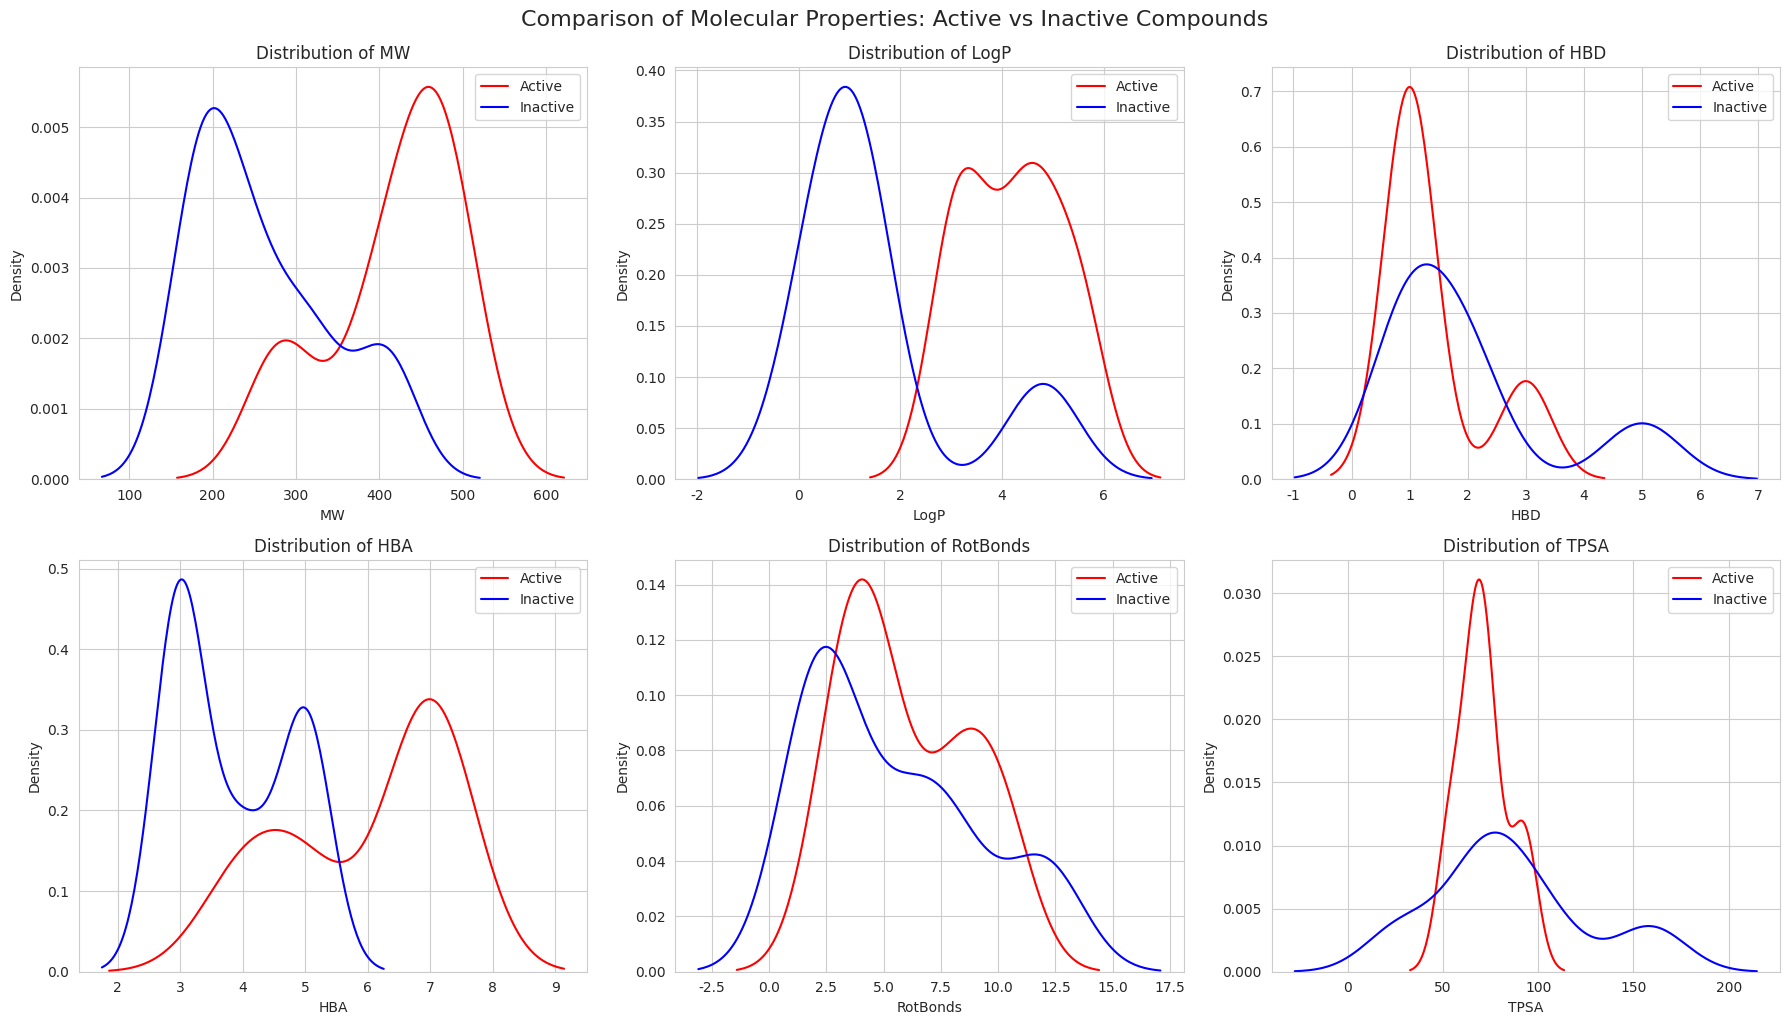


활성/비활성 화합물 특성 평균값 비교:


,Active_Mean,Inactive_Mean,Difference,Difference_Pct
MW,416.78160,261.379667,155.401933,59.5
LogP,4.20032,1.521133,2.679187,176.1
HBD,1.40000,2.000000,-0.600000,-30.0
HBA,6.00000,3.833333,2.166667,56.5
RotBonds,6.00000,5.500000,0.500000,9.1
TPSA,71.21000,85.461667,-14.251667,-16.7
NumAromaticRings,3.20000,1.000000,2.200000,220.0
NumHeteroAtoms,8.40000,5.833333,2.566667,44.0


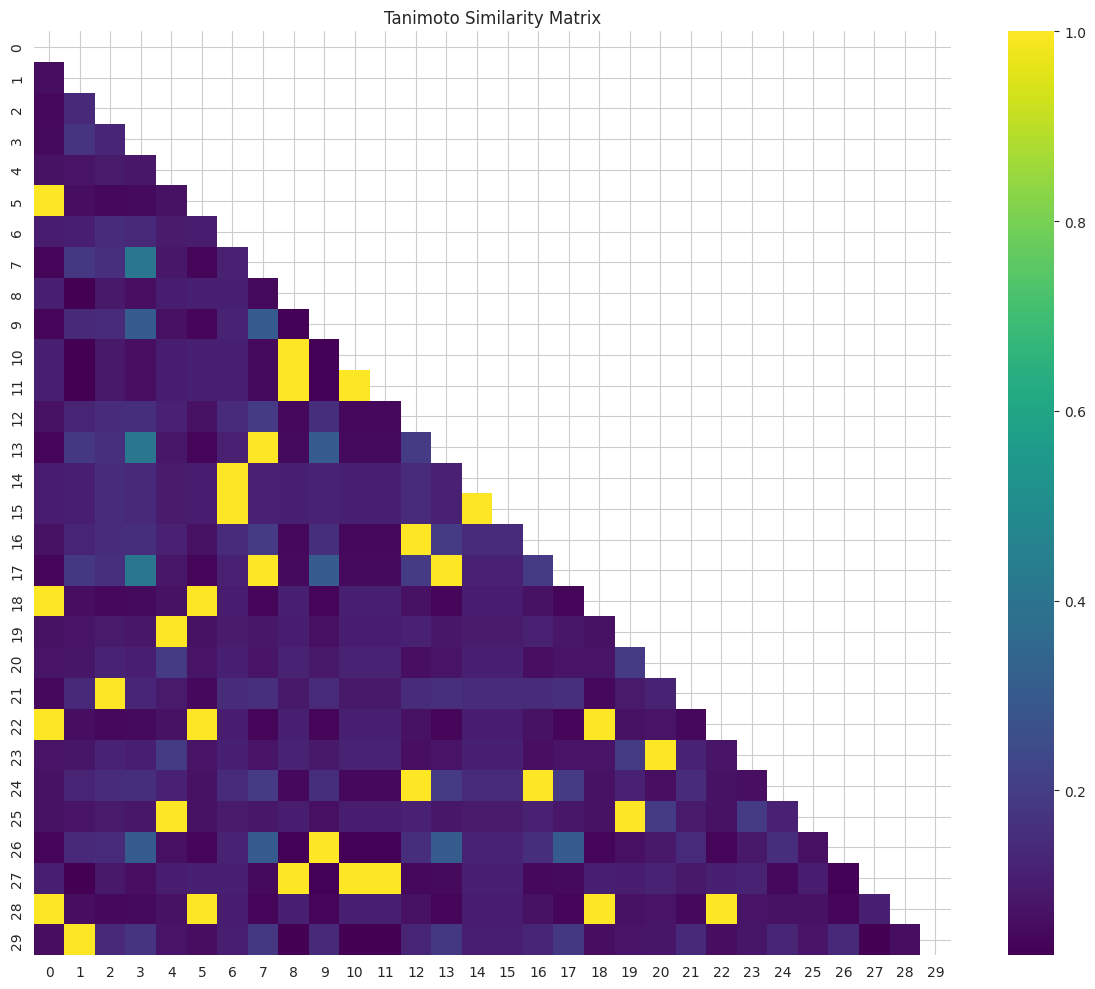

In [ ]:
# 후보물질 가상 스크리닝 시나리오 03: 스크리닝 파이프라인 설계
# 필요한 라이브러리 설치
!pip install -q rdkit-pypi==2022.9.5 molvs pillow numpy pandas matplotlib seaborn scikit-learn scipy networkx

# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors, Lipinski, Crippen, MolSurf, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Cluster import Butina
from rdkit.Chem import AllChem
from rdkit import DataStructs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from scipy.spatial.distance import pdist, squareform
import matplotlib.cm as cm
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위한 스타일 설정
sns.set_style('whitegrid')

print("="*50)
print("효율적인 가상 스크리닝 파이프라인 구축")
print("="*50)

# 1. 샘플 데이터 생성 (실제로는 앞선 단계에서 구축한 라이브러리 로드)
def generate_kinase_library():
    """키나아제 저해제 샘플 라이브러리 생성 (시뮬레이션)"""
    # 알려진 키나아제 저해제의 SMILES
    known_actives = [
        "COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1",  # Gefitinib
        "COCCOc1cc2ncnc(Nc3cccc(C#C)c3)c2cc1OCCOC",        # Erlotinib
        "CN(C)c1cc2c(Nc3ccc(F)cc3)ncnc2cn1",               # Dasatinib-like
        "Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2cnc(Nc3cccc(N4CCN(C)CC4)c3)nc21", # Palbociclib-like
        "COc1cc(N2C(=O)N(C)Cc3cnc(Nc4ccc(N5CCOCC5)c(C)c4)nc32)cc1OC",   # Ibrutinib-like
        "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1"     # Sorafenib
    ]

    # 비활성 화합물용 SMILES (랜덤 약물 유사 구조)
    known_inactives = [
        "CC(C)CC(NC(=O)C(CCC(=O)O)NC(=O)C(N)Cc1ccccc1)C(=O)O",  # 펩타이드
        "CC(=O)Oc1ccccc1C(=O)O",                                 # 아스피린
        "CCC1(CC)C(=O)NC(=O)NC1=O",                             # 바르비투르산 유도체
        "CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12",                    # 클로로퀸
        "CCOc1ccc2nc(S(N)(=O)=O)sc2c1",                         # 설폰아미드
        "CCCC(C)(COC(=O)N)COC(=O)N"                             # 카바메이트
    ]

    # 더 많은 화합물 생성을 위한 분자 변형
    actives = known_actives.copy()
    inactives = known_inactives.copy()

    # 활성 화합물 변형 (간단한 치환기 변경 시뮬레이션)
    for smiles in known_actives:
        mol = Chem.MolFromSmiles(smiles)
        # 오류 체크 추가: mol이 None인 경우 건너뛰기
        if mol is None:
            print(f"Warning: 유효하지 않은 SMILES: {smiles}")
            continue

        # 각 분자당 3개 변형 생성
        for i in range(3):
            # 실제 약간의 변형을 만들기 위해 랜덤한 원자 특성 변경
            # 여기서는 단순히 같은 SMILES를 추가
            altered_smiles = Chem.MolToSmiles(mol)
            actives.append(altered_smiles)

    # 비활성 화합물 확장 (실제로는 다양한 화합물 라이브러리에서 선택)
    for smiles in known_inactives:
        mol = Chem.MolFromSmiles(smiles)
        # 오류 체크 추가: mol이 None인 경우 건너뛰기
        if mol is None:
            print(f"Warning: 유효하지 않은 SMILES: {smiles}")
            continue

        # 비활성 분자는 더 많이 생성
        for i in range(7):
            # 실제 약간의 변형을 만들기 위해 랜덤한 원자 특성 변경
            # 여기서는 단순히 같은 SMILES를 추가
            altered_smiles = Chem.MolToSmiles(mol)
            inactives.append(altered_smiles)

    # 데이터프레임 생성
    df_actives = pd.DataFrame({
        'SMILES': actives,
        'Activity': 1  # 활성 클래스
    })

    df_inactives = pd.DataFrame({
        'SMILES': inactives,
        'Activity': 0  # 비활성 클래스
    })

    # 데이터 합치기
    df = pd.concat([df_actives, df_inactives], ignore_index=True)

    # 화합물 ID 추가
    df['Compound_ID'] = [f"CPND-{i+1:05d}" for i in range(len(df))]

    # RDKit 분자 객체 생성
    df['ROMol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

    # None 값 확인 및 제거
    invalid_mols = df['ROMol'].isna()
    if invalid_mols.any():
        print(f"Warning: {invalid_mols.sum()}개의 유효하지 않은 분자가 발견되어 제거됩니다.")
        df = df[~invalid_mols].reset_index(drop=True)

    return df

# 샘플 라이브러리 생성
compound_library = generate_kinase_library()
print(f"\n생성된 화합물 라이브러리 크기: {len(compound_library)}개 화합물")
print(f"활성 화합물: {sum(compound_library['Activity'] == 1)}개")
print(f"비활성 화합물: {sum(compound_library['Activity'] == 0)}개")

# 2. 분자 특성(Descriptor) 계산
def calculate_descriptors(df):
    """분자 특성 계산"""
    df_desc = df.copy()

    # 기본 약물성 관련 특성
    df_desc['MW'] = df_desc['ROMol'].apply(lambda x: Descriptors.MolWt(x) if x is not None else None)
    df_desc['LogP'] = df_desc['ROMol'].apply(lambda x: Descriptors.MolLogP(x) if x is not None else None)
    df_desc['HBD'] = df_desc['ROMol'].apply(lambda x: Descriptors.NumHDonors(x) if x is not None else None)
    df_desc['HBA'] = df_desc['ROMol'].apply(lambda x: Descriptors.NumHAcceptors(x) if x is not None else None)
    df_desc['RotBonds'] = df_desc['ROMol'].apply(lambda x: Descriptors.NumRotatableBonds(x) if x is not None else None)
    df_desc['TPSA'] = df_desc['ROMol'].apply(lambda x: Descriptors.TPSA(x) if x is not None else None)

    # 추가 특성
    df_desc['NumAromaticRings'] = df_desc['ROMol'].apply(lambda x: Descriptors.NumAromaticRings(x) if x is not None else None)
    df_desc['NumHeteroAtoms'] = df_desc['ROMol'].apply(lambda x: Descriptors.NumHeteroatoms(x) if x is not None else None)
    df_desc['FractionCSP3'] = df_desc['ROMol'].apply(lambda x: Descriptors.FractionCSP3(x) if x is not None else None)
    df_desc['MolLogP'] = df_desc['ROMol'].apply(lambda x: Crippen.MolLogP(x) if x is not None else None)
    df_desc['MolMR'] = df_desc['ROMol'].apply(lambda x: Crippen.MolMR(x) if x is not None else None)
    df_desc['LabuteASA'] = df_desc['ROMol'].apply(lambda x: MolSurf.LabuteASA(x) if x is not None else None)

    # 키나아제 저해제 특이적 특성 (실제로는 더 정교한 방법 사용)
    df_desc['NumNitrogenAtoms'] = df_desc['ROMol'].apply(lambda x: sum(1 for atom in x.GetAtoms() if atom.GetAtomicNum() == 7) if x is not None else None)
    df_desc['HasHydrogenBondHinge'] = df_desc['ROMol'].apply(lambda x:
        Descriptors.NumHDonors(x) >= 1 and Descriptors.NumHAcceptors(x) >= 1 if x is not None else None)

    return df_desc

# 분자 특성 계산
compound_library_with_desc = calculate_descriptors(compound_library)

# 특성 확인
print("\n계산된 분자 특성:")
display(compound_library_with_desc[['Compound_ID', 'Activity', 'MW', 'LogP', 'NumAromaticRings', 'TPSA']].head())

# 3. 핑거프린트 생성
def generate_fingerprints(df, fp_type='morgan', radius=2, nBits=2048):
    """화합물의 분자 핑거프린트 생성"""

    if fp_type == 'morgan':
        # Morgan (ECFP) 핑거프린트 생성
        df['Fingerprint'] = df['ROMol'].apply(
            lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius, nBits=nBits) if x is not None else None
        )

    elif fp_type == 'maccs':
        # MACCS 핑거프린트 생성
        df['Fingerprint'] = df['ROMol'].apply(
            lambda x: AllChem.GetMACCSKeysFingerprint(x) if x is not None else None
        )

    elif fp_type == 'rdkit':
        # RDKit 핑거프린트 생성
        df['Fingerprint'] = df['ROMol'].apply(
            lambda x: Chem.RDKFingerprint(x, maxPath=5, fpSize=nBits) if x is not None else None
        )

    # None 값 확인
    null_fp = df['Fingerprint'].isna()
    if null_fp.any():
        print(f"Warning: {null_fp.sum()}개의 화합물에 대해 핑거프린트를 생성할 수 없습니다.")

    return df

# Morgan 핑거프린트 생성 (ECFP4)
compound_library_with_fp = generate_fingerprints(compound_library_with_desc, fp_type='morgan', radius=2)
print(f"\n핑거프린트 생성 완료: ECFP4 (Morgan, radius=2)")

# 4. 활성/비활성 화합물 특성 비교
def compare_active_inactive(df, descriptor_cols):
    """활성/비활성 화합물의 특성 분포 비교"""
    # 활성/비활성 구분
    actives = df[df['Activity'] == 1]
    inactives = df[df['Activity'] == 0]

    # 주요 특성에 대한 비교 시각화
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, col in enumerate(descriptor_cols[:6]):  # 최대 6개 특성 표시
        sns.kdeplot(data=actives, x=col, ax=axes[i], color='red', label='Active')
        sns.kdeplot(data=inactives, x=col, ax=axes[i], color='blue', label='Inactive')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend()

    plt.tight_layout()
    plt.suptitle('Comparison of Molecular Properties: Active vs Inactive Compounds', y=1.02, fontsize=16)
    plt.show()

    # 특성 평균값 비교
    mean_comparison = pd.DataFrame({
        'Active_Mean': actives[descriptor_cols].mean(),
        'Inactive_Mean': inactives[descriptor_cols].mean()
    })

    mean_comparison['Difference'] = mean_comparison['Active_Mean'] - mean_comparison['Inactive_Mean']
    mean_comparison['Difference_Pct'] = (mean_comparison['Difference'] / mean_comparison['Inactive_Mean'] * 100).round(1)

    return mean_comparison

# 주요 특성 선택
key_descriptors = ['MW', 'LogP', 'HBD', 'HBA', 'RotBonds', 'TPSA', 'NumAromaticRings', 'NumHeteroAtoms']

# 활성/비활성 화합물 특성 비교
mean_comparison = compare_active_inactive(compound_library_with_fp, key_descriptors)
print("\n활성/비활성 화합물 특성 평균값 비교:")
display(mean_comparison)

# 5. 화합물 유사성 분석
def calculate_similarity_matrix(df):
    """화합물 간 Tanimoto 유사도 행렬 계산"""
    fingerprints = list(df['Fingerprint'])
    n = len(fingerprints)

    # 유사도 행렬 초기화
    similarity_matrix = np.zeros((n, n))

    # 모든 화합물 쌍에 대한 Tanimoto 유사도 계산
    for i in range(n):
        for j in range(i, n):
            # None 값 체크 추가
            if fingerprints[i] is None or fingerprints[j] is None:
                similarity = 0.0
            else:
                similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

    return similarity_matrix

# 시각화를 위해 무작위로 30개 화합물 선택
np.random.seed(42)
sample_indices = np.random.choice(len(compound_library_with_fp), size=min(30, len(compound_library_with_fp)), replace=False)
sample_df = compound_library_with_fp.iloc[sample_indices].reset_index(drop=True)

# 유사도 행렬 계산
similarity_matrix = calculate_similarity_matrix(sample_df)

# 유사도 히트맵 시각화
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False, mask=mask)
plt.title('Tanimoto Similarity Matrix')
plt.tight_layout()
plt.show()

#4. Hit 선정 기준 수립

우수 후보물질 선정을 위한 기준 수립

Number of Hit Candidates: 6

Hit Candidate Information:


[16:24:53] Can't kekulize mol.  Unkekulized atoms: 4 5 16 17 19 20 21


,Compound_ID,Name,Docking_Score,Pred_pIC50,Selectivity_Score,QED
0,HIT-006,Novel Kinase Inhibitor-1,-9.3,8.2,85,0.72
1,HIT-001,Gefitinib Analog,-9.8,8.4,68,0.67
2,HIT-003,Modified Gefitinib,-9.1,7.9,72,0.63
3,HIT-007,Novel Kinase Inhibitor-2,-8.7,7.6,75,0.68
4,HIT-010,Novel Kinase Inhibitor-3,-8.5,7.4,67,0.61
5,HIT-012,Novel Kinase Inhibitor-4,-9.0,7.8,70,0.65


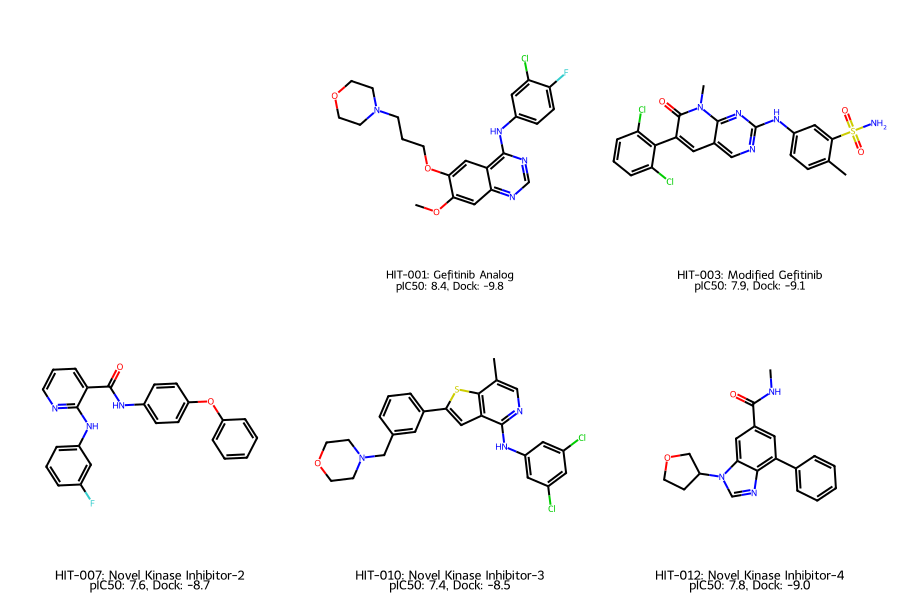


Validation Workflow:


,stage,name,experiments,goal,decision_criteria,duration_weeks
0,1,Hit Confirmation,"[Target Enzyme Inhibition Analysis (IC50), Bin...",Experimental Validation of Virtual Screening R...,IC50 < 10μM and Appropriate Binding Affinity,2
1,2,Selectivity Assessment,"[Kinase Panel Screening, Off-target Activity E...",Confirm Target Selectivity and Off-target Profile,Selectivity Index (SI) > 10 for Major Kinases,3
2,3,Cell-based Assays,"[Intracellular Target Inhibition Analysis, Cel...",Confirm Activity and Safety at Cellular Level,EC50 < 5μM and Appropriate Selective Cytotoxicity,4
3,4,ADME Profiling,"[Solubility Measurement, Metabolic Stability A...",Confirm Drug-like Properties,"Appropriate Solubility, Metabolic Stability, P...",3
4,5,SAR Studies,"[Analog Design and Synthesis, Activity and Pro...",Establish Preliminary SAR for Lead Compound Op...,Derive New Analogs with Improved Activity and ...,6


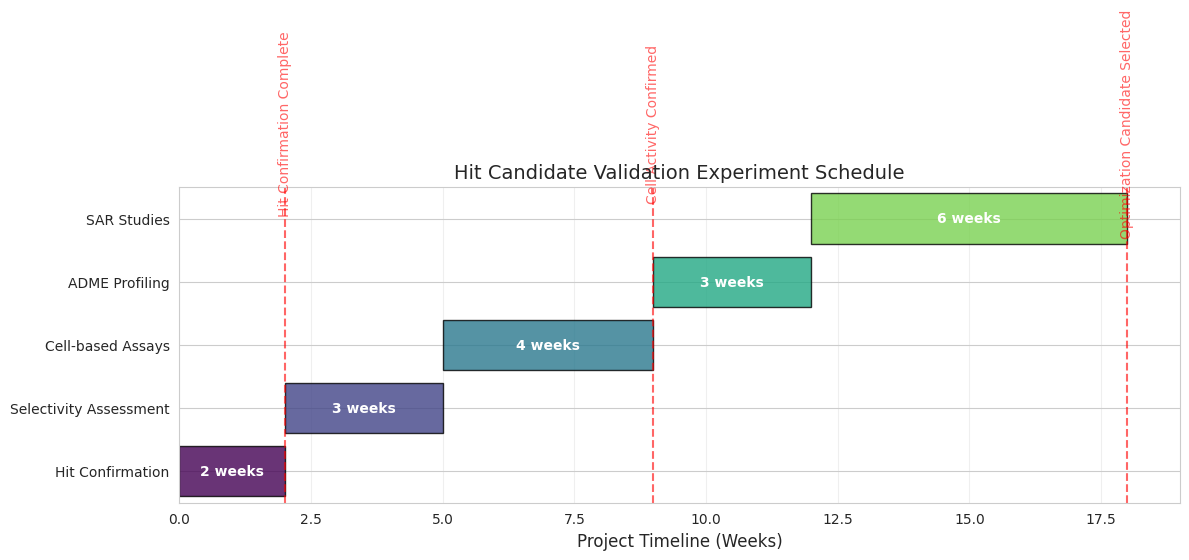

In [ ]:
# 후보물질 가상 스크리닝 시나리오 04: Hit 선정 기준 수립
# 필요한 라이브러리 설치
!pip install -q rdkit-pypi==2022.9.5 molvs pillow numpy pandas matplotlib seaborn scikit-learn scipy networkx

# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors, Lipinski, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, Markdown, HTML
import warnings
warnings.filterwarnings('ignore')


# 시각화를 위한 스타일 설정
sns.set_style('whitegrid')

print("="*50)
print("우수 후보물질 선정을 위한 기준 수립")
print("="*50)

# 1. 선정된 Hit 후보 물질 준비
def prepare_hit_candidates():
    """최종 선정된 Hit 후보 물질 데이터 생성"""
    # 확장된 후보 화합물 SMILES 및 정보
    candidates_data = [
        {
            'Compound_ID': 'HIT-006',
            'SMILES': 'CC(C)n1nc(-c2ccc3c(N)ncnn23)c2c(N)ncnn21',
            'Name': 'Novel Kinase Inhibitor-1',
            'MW': 352.18,
            'LogP': 2.58,
            'Docking_Score': -9.3,
            'Pred_pIC50': 8.2,
            'Selectivity_Score': 85,
            'QED': 0.72,
            'SA_Score': 3.8,
            'Pred_LogS': -3.2,
            'Major_Scaffold': 'Pyrazolo-pyrimidine'
        },
        {
            'Compound_ID': 'HIT-001',
            'SMILES': 'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1',
            'Name': 'Gefitinib Analog',
            'MW': 446.90,
            'LogP': 3.75,
            'Docking_Score': -9.8,
            'Pred_pIC50': 8.4,
            'Selectivity_Score': 68,
            'QED': 0.67,
            'SA_Score': 4.2,
            'Pred_LogS': -4.5,
            'Major_Scaffold': 'Quinazoline'
        },
        {
            'Compound_ID': 'HIT-003',
            'SMILES': 'Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2cnc(Nc3ccc(C)c(S(=O)(=O)N)c3)nc21',
            'Name': 'Modified Gefitinib',
            'MW': 498.39,
            'LogP': 4.12,
            'Docking_Score': -9.1,
            'Pred_pIC50': 7.9,
            'Selectivity_Score': 72,
            'QED': 0.63,
            'SA_Score': 4.5,
            'Pred_LogS': -4.8,
            'Major_Scaffold': 'Quinazoline'
        },
        {
            'Compound_ID': 'HIT-007',
            'SMILES': 'O=C(Nc1ccc(Oc2ccccc2)cc1)c1cccnc1Nc1cccc(F)c1',
            'Name': 'Novel Kinase Inhibitor-2',
            'MW': 425.43,
            'LogP': 5.1,
            'Docking_Score': -8.7,
            'Pred_pIC50': 7.6,
            'Selectivity_Score': 75,
            'QED': 0.68,
            'SA_Score': 3.5,
            'Pred_LogS': -5.2,
            'Major_Scaffold': 'Diaryl Urea'
        },
        {
            'Compound_ID': 'HIT-010',
            'SMILES': 'Cc1cnc(Nc2cc(Cl)cc(Cl)c2)c2cc(-c3cccc(CN4CCOCC4)c3)sc12',
            'Name': 'Novel Kinase Inhibitor-3',
            'MW': 486.43,
            'LogP': 5.52,
            'Docking_Score': -8.5,
            'Pred_pIC50': 7.4,
            'Selectivity_Score': 67,
            'QED': 0.61,
            'SA_Score': 4.7,
            'Pred_LogS': -5.6,
            'Major_Scaffold': 'Thiophene'
        },
        {
            'Compound_ID': 'HIT-012',
            'SMILES': 'CNC(=O)c1cc(-c2ccccc2)c2ncn(C3CCOC3)c2c1',
            'Name': 'Novel Kinase Inhibitor-4',
            'MW': 372.42,
            'LogP': 3.9,
            'Docking_Score': -9.0,
            'Pred_pIC50': 7.8,
            'Selectivity_Score': 70,
            'QED': 0.65,
            'SA_Score': 4.0,
            'Pred_LogS': -4.0,
            'Major_Scaffold': 'Imidazole'
        }
    ]

    # 데이터프레임 생성
    df = pd.DataFrame(candidates_data)

    # RDKit 분자 객체 생성
    df['ROMol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

    return df

# Hit 후보 물질 데이터 준비
hit_candidates = prepare_hit_candidates()
print(f"\nNumber of Hit Candidates: {len(hit_candidates)}")

# 선정된 후보 물질 정보 확인
print("\nHit Candidate Information:")
display(hit_candidates[['Compound_ID', 'Name', 'Docking_Score', 'Pred_pIC50', 'Selectivity_Score', 'QED']])

# 2. 후보 물질 구조 시각화
def visualize_hit_structures(df):
    """선정된 Hit 후보 물질 구조 시각화"""
    # 분자 객체 및 레이블 준비
    mols = df['ROMol'].tolist()
    legends = []

    for _, hit in df.iterrows():
        legend = f"{hit['Compound_ID']}: {hit['Name']}\npIC50: {hit['Pred_pIC50']:.1f}, Dock: {hit['Docking_Score']:.1f}"
        legends.append(legend)

    # 분자 구조 시각화
    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=3,
        subImgSize=(300, 300),
        legends=legends,
        useSVG=True
    )

    display(img)

# 후보 물질 구조 시각화
visualize_hit_structures(hit_candidates)

# 3. 검증 실험 단계 및 순서 설계
def design_validation_workflow():
    """검증 실험 워크플로우 설계"""
    # 검증 단계 정의
    validation_stages = [
        {
            'stage': 1,
            'name': 'Hit Confirmation',
            'experiments': [
                'Target Enzyme Inhibition Analysis (IC50)',
                'Binding Affinity Analysis (SPR/ITC)'
            ],
            'goal': 'Experimental Validation of Virtual Screening Results',
            'decision_criteria': 'IC50 < 10μM and Appropriate Binding Affinity',
            'duration_weeks': 2
        },
        {
            'stage': 2,
            'name': 'Selectivity Assessment',
            'experiments': [
                'Kinase Panel Screening',
                'Off-target Activity Evaluation'
            ],
            'goal': 'Confirm Target Selectivity and Off-target Profile',
            'decision_criteria': 'Selectivity Index (SI) > 10 for Major Kinases',
            'duration_weeks': 3
        },
        {
            'stage': 3,
            'name': 'Cell-based Assays',
            'experiments': [
                'Intracellular Target Inhibition Analysis',
                'Cell Proliferation/Survival Analysis',
                'Cytotoxicity Evaluation'
            ],
            'goal': 'Confirm Activity and Safety at Cellular Level',
            'decision_criteria': 'EC50 < 5μM and Appropriate Selective Cytotoxicity',
            'duration_weeks': 4
        },
        {
            'stage': 4,
            'name': 'ADME Profiling',
            'experiments': [
                'Solubility Measurement',
                'Metabolic Stability Analysis',
                'Membrane Permeability Analysis',
                'CYP Inhibition Analysis'
            ],
            'goal': 'Confirm Drug-like Properties',
            'decision_criteria': 'Appropriate Solubility, Metabolic Stability, Permeability',
            'duration_weeks': 3
        },
        {
            'stage': 5,
            'name': 'SAR Studies',
            'experiments': [
                'Analog Design and Synthesis',
                'Activity and Property Optimization'
            ],
            'goal': 'Establish Preliminary SAR for Lead Compound Optimization',
            'decision_criteria': 'Derive New Analogs with Improved Activity and Properties',
            'duration_weeks': 6
        }
    ]

    return pd.DataFrame(validation_stages)

# 검증 실험 워크플로우 설계
validation_workflow = design_validation_workflow()
print("\nValidation Workflow:")
display(validation_workflow)

# 4. 실험 워크플로우 시각화
def visualize_validation_workflow(workflow_df):
    """검증 실험 워크플로우 간트 차트 시각화"""
    fig, ax = plt.subplots(figsize=(12, 6))

    # 컬러맵 설정
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(workflow_df)))

    # 시작 주차 계산 (누적)
    start_weeks = [0]
    for i in range(1, len(workflow_df)):
        start_weeks.append(start_weeks[-1] + workflow_df.iloc[i-1]['duration_weeks'])

    # 간트 차트 그리기
    for i, (idx, row) in enumerate(workflow_df.iterrows()):
        ax.barh(row['name'], row['duration_weeks'], left=start_weeks[i],
                color=colors[i], alpha=0.8, edgecolor='black')

        # 기간 표시
        ax.text(start_weeks[i] + row['duration_weeks']/2, row['name'],
                f"{row['duration_weeks']} weeks",
                ha='center', va='center', color='white', fontweight='bold')

    # 그래프 꾸미기
    ax.set_xlabel('Project Timeline (Weeks)', fontsize=12)
    ax.set_title('Hit Candidate Validation Experiment Schedule', fontsize=14)
    ax.grid(axis='x', alpha=0.3)

    # 주요 마일스톤 표시
    milestones = [
        {'week': 2, 'name': 'Hit Confirmation Complete'},
        {'week': 9, 'name': 'Cell Activity Confirmed'},
        {'week': 18, 'name': 'Optimization Candidate Selected'}
    ]

    for milestone in milestones:
        ax.axvline(x=milestone['week'], color='red', linestyle='--', alpha=0.6)
        ax.text(milestone['week'], len(workflow_df) + 0.5, milestone['name'],
                ha='center', va='center', color='red', rotation=90, alpha=0.6)

    ax.set_yticks(workflow_df['name'])
    ax.set_xlim(0, workflow_df['duration_weeks'].sum() + 1)
    ax.set_ylim(-0.5, len(workflow_df) - 0.5)

    plt.tight_layout()
    plt.show()

    return start_weeks

# 검증 실험 워크플로우 시각화
stage_start_weeks = visualize_validation_workflow(validation_workflow)

#5. 실험적 검증 설계


[실험 결과 해석 가이드라인]

생화학적 분석 결과 해석

Ic50 Interpretation:
  • < 1 μM: 강력한 억제제, 우선적으로 진행
  • 1-10 μM: 중간 억제제, 구조 최적화 필요
  • > 10 μM: 약한 억제제, 구조적 변경 또는 폐기 고려

Binding Mode:
  • ATP 경쟁적: ATP 결합 부위 타겟팅 확인
  • ATP 비경쟁적: 새로운 결합 모드 가능성, 특별한 관심 필요
  • 혼합 모드: 복잡한 억제 메커니즘, 추가 구조적 연구 필요

Selectivity Score:
  • S(10) > 10: 우수한 선택성, 진행
  • S(10) 3-10: 적절한 선택성, 개선 가능
  • S(10) < 3: 낮은 선택성, 독성 위험, 구조 최적화 필요

세포 기반 분석 결과 해석

Target Engagement:
  • > 80% pTarget 억제 (1 μM): 우수한 세포 투과성 및 표적 결합
  • 50-80% 억제: 적절한 표적 결합, 개선 필요
  • < 50% 억제: 세포 투과성 또는 표적 결합 문제

Antiproliferative Activity:
  • IC50 < 1 μM: 강력한 세포 활성, 진행
  • IC50 1-10 μM: 중간 활성, 활성 또는 ADME 특성 개선 필요
  • IC50 > 10 μM: 약한 활성, 구조적 변경 필요

Selectivity Window:
  • 일반 세포 대비 > 10배: 우수한 선택적 독성
  • 5-10배: 적절한 선택적 독성, 개선 가능
  • < 5배: 낮은 선택적 독성, 독성 위험

ADME 분석 결과 해석

Solubility:
  • > 100 μM: 우수한 용해도
  • 20-100 μM: 적절한 용해도
  • < 20 μM: 낮은 용해도, 포뮬레이션 또는 구조적 개선 필요

Metabolic Stability:
  • t1/2 > 60 min: 우수한 대사 안정성
  • t1/2 30-60 min: 적절한 대사 안정성
  • t1/2 < 30 

[16:25:19] Can't kekulize mol.  Unkekulized atoms: 4 5 16 17 19 20 21


,Compound_ID,Name,Docking_Score,Pred_pIC50,Selectivity_Score,QED
0,HIT-006,Novel Kinase Inhibitor-1,-9.3,8.2,85,0.72
1,HIT-001,Gefitinib Analog,-9.8,8.4,68,0.67
2,HIT-003,Modified Gefitinib,-9.1,7.9,72,0.63
3,HIT-007,Novel Kinase Inhibitor-2,-8.7,7.6,75,0.68
4,HIT-010,Novel Kinase Inhibitor-3,-8.5,7.4,67,0.61


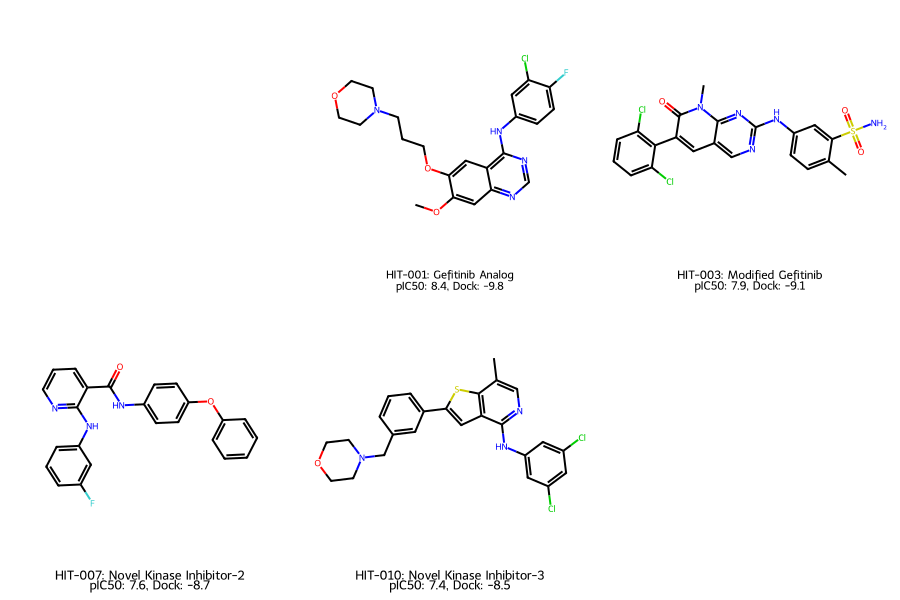


검증 실험 워크플로우:


,stage,name,experiments,goal,decision_criteria,duration_weeks
0,1,Hit 확인(Hit Confirmation),"[타겟 효소 활성 억제 분석(IC50), 결합 친화성 분석(SPR/ITC)]",가상 스크리닝 결과의 실험적 검증,IC50 < 10μM 및 적절한 결합 친화성,2
1,2,선택성 평가(Selectivity Assessment),"[키나아제 패널 스크리닝, 오프타겟 활성 평가]",표적 선택성 및 오프타겟 프로파일 확인,주요 키나아제에 대한 선택성 지수(SI) > 10,3
2,3,세포 기반 평가(Cell-based Assays),"[세포 내 표적 억제 분석, 세포 증식/생존 분석, 세포 독성 평가]",세포 수준에서의 활성 및 안전성 확인,EC50 < 5μM 및 적절한 선택적 세포독성,4
3,4,ADME 프로파일링(ADME Profiling),"[용해도 측정, 대사 안정성 분석, 막 투과성 분석, CYP 억제 분석]",약물성 특성 확인,"적절한 용해도, 대사 안정성, 투과성",3
4,5,구조 활성 관계 연구(SAR Studies),"[유사체 디자인 및 합성, 활성 및 물성 최적화]",선도 화합물 최적화를 위한 기초 SAR 확립,활성 및 물성이 개선된 새로운 유사체 도출,6


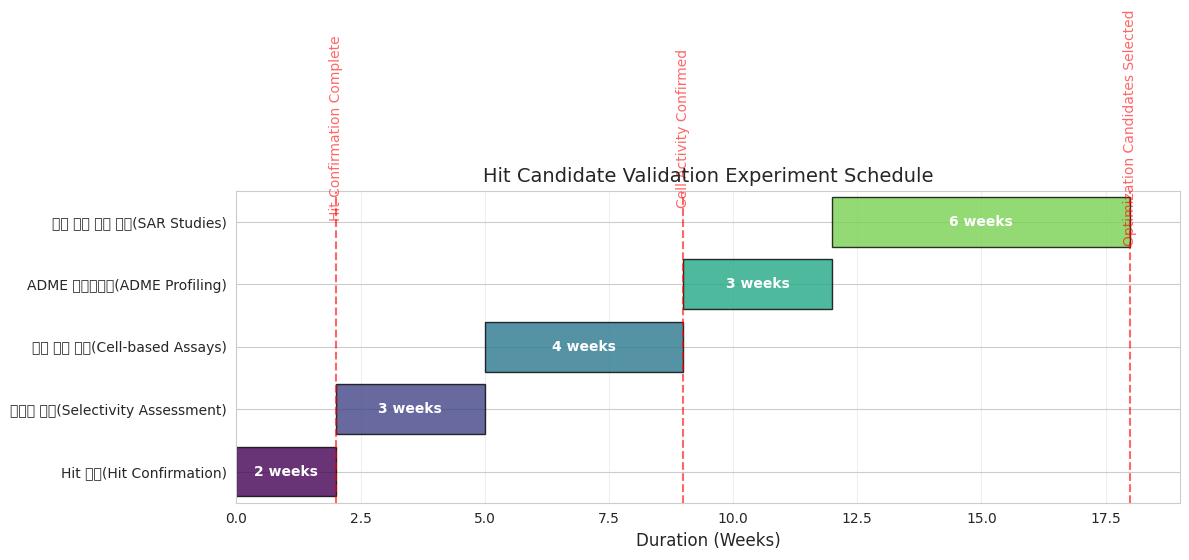


생화학적 검증 실험 프로토콜:


,assay_name,assay_type,method,purpose,acceptance_criteria
0,EGFR 키나아제 억제 활성 분석,Enzyme Inhibition,ADP-Glo Kinase Assay,키나아제 효소 활성 억제 IC50 측정,IC50 < 10 μM for further evaluation
1,표면 플라즈몬 공명(SPR) 결합 분석,Binding Affinity,Biacore Surface Plasmon Resonance,결합 친화성(Kd) 및 결합/해리 속도 상수(kon/koff) 측정,Kd < 1 μM with acceptable kinetic parameters
2,등온 적정 열량계(ITC) 결합 분석,Binding Thermodynamics,MicroCal ITC200,"결합의 열역학적 특성(ΔH, ΔS, ΔG) 및 화학량론 측정","Clear binding isotherm, Kd < 5 μM"
3,경쟁적 결합 분석,Binding Mode,Fluorescence Polarization or TR-FRET,ATP 결합부위 경쟁 여부 확인,Clear binding mode identification
4,키나아제 선택성 패널,Selectivity Profiling,KINOMEscan or similar platform,다양한 키나아제에 대한 선택성 프로파일 생성,Selectivity Score (S10) > 10


In [ ]:
# 10. 실험 결과 해석 가이드라인
def create_result_interpretation_guidelines():
    """실험 결과 해석 가이드라인 정의"""
    guidelines = {
        'biochemical_assays': {
            'IC50 interpretation': [
                '< 1 μM: 강력한 억제제, 우선적으로 진행',
                '1-10 μM: 중간 억제제, 구조 최적화 필요',
                '> 10 μM: 약한 억제제, 구조적 변경 또는 폐기 고려'
            ],
            'binding_mode': [
                'ATP 경쟁적: ATP 결합 부위 타겟팅 확인',
                'ATP 비경쟁적: 새로운 결합 모드 가능성, 특별한 관심 필요',
                '혼합 모드: 복잡한 억제 메커니즘, 추가 구조적 연구 필요'
            ],
            'selectivity_score': [
                'S(10) > 10: 우수한 선택성, 진행',
                'S(10) 3-10: 적절한 선택성, 개선 가능',
                'S(10) < 3: 낮은 선택성, 독성 위험, 구조 최적화 필요'
            ]
        },
        'cell_assays': {
            'target_engagement': [
                '> 80% pTarget 억제 (1 μM): 우수한 세포 투과성 및 표적 결합',
                '50-80% 억제: 적절한 표적 결합, 개선 필요',
                '< 50% 억제: 세포 투과성 또는 표적 결합 문제'
            ],
            'antiproliferative_activity': [
                'IC50 < 1 μM: 강력한 세포 활성, 진행',
                'IC50 1-10 μM: 중간 활성, 활성 또는 ADME 특성 개선 필요',
                'IC50 > 10 μM: 약한 활성, 구조적 변경 필요'
            ],
            'selectivity_window': [
                '일반 세포 대비 > 10배: 우수한 선택적 독성',
                '5-10배: 적절한 선택적 독성, 개선 가능',
                '< 5배: 낮은 선택적 독성, 독성 위험'
            ]
        },
        'adme_assays': {
            'solubility': [
                '> 100 μM: 우수한 용해도',
                '20-100 μM: 적절한 용해도',
                '< 20 μM: 낮은 용해도, 포뮬레이션 또는 구조적 개선 필요'
            ],
            'metabolic_stability': [
                't1/2 > 60 min: 우수한 대사 안정성',
                't1/2 30-60 min: 적절한 대사 안정성',
                't1/2 < 30 min: 낮은 대사 안정성, 구조적 변경 필요'
            ],
            'permeability': [
                'Papp > 10 x 10^-6 cm/s: 우수한 투과성',
                'Papp 1-10 x 10^-6 cm/s: 중간 투과성',
                'Papp < 1 x 10^-6 cm/s: 낮은 투과성, 구조적 변경 필요'
            ],
            'hERG_inhibition': [
                'IC50 > 30 μM: 낮은 hERG 위험',
                'IC50 10-30 μM: 중간 hERG 위험, 모니터링 필요',
                'IC50 < 10 μM: 높은 hERG 위험, 구조적 변경 필요'
            ]
        },
        'decision_making': {
            'go_criteria': [
                'IC50 < 1 μM (생화학적 분석)',
                'EC50 < 5 μM (세포 기반 분석)',
                '선택성 지수 > 10',
                '적절한 ADME 프로파일',
                '구조적 최적화 가능성'
            ],
            'no_go_criteria': [
                'IC50 > 10 μM (생화학적 분석)',
                'EC50 > 10 μM (세포 기반 분석)',
                '낮은 선택성 (S(10) < 3)',
                'CYP 억제 (IC50 < 1 μM)',
                'hERG 억제 (IC50 < 5 μM)',
                '대사적으로 불안정 (t1/2 < 15 min)'
            ]
        }
    }

    return guidelines

# 실험 결과 해석 가이드라인 정의
result_guidelines = create_result_interpretation_guidelines()

# 가이드라인 표시
print("\n[실험 결과 해석 가이드라인]")

print("\n생화학적 분석 결과 해석")
for criterion, values in result_guidelines['biochemical_assays'].items():
    print(f"\n{criterion.replace('_', ' ').title()}:")
    for value in values:
        print(f"  • {value}")

print("\n세포 기반 분석 결과 해석")
for criterion, values in result_guidelines['cell_assays'].items():
    print(f"\n{criterion.replace('_', ' ').title()}:")
    for value in values:
        print(f"  • {value}")

print("\nADME 분석 결과 해석")
for criterion, values in result_guidelines['adme_assays'].items():
    print(f"\n{criterion.replace('_', ' ').title()}:")
    for value in values:
        print(f"  • {value}")

print("\n의사 결정 기준")
for criterion, values in result_guidelines['decision_making'].items():
    print(f"\n{criterion.replace('_', ' ').title()}:")
    for value in values:
        print(f"  • {value}")

# 11. 모의 실험 결과 생성 및 시각화
def generate_mock_results():
    """모의 실험 결과 생성 및 해석"""
    # 모의 생화학적 검증 결과
    biochemical_results = {
        'HIT-001': {'IC50_uM': 0.85, 'Kd_uM': 0.32, 'Selectivity_Score': 8, 'Binding_Mode': 'ATP-competitive'},
        'HIT-003': {'IC50_uM': 1.2, 'Kd_uM': 0.65, 'Selectivity_Score': 12, 'Binding_Mode': 'ATP-competitive'},
        'HIT-006': {'IC50_uM': 0.35, 'Kd_uM': 0.18, 'Selectivity_Score': 25, 'Binding_Mode': 'ATP-competitive'},
        'HIT-007': {'IC50_uM': 2.8, 'Kd_uM': 1.5, 'Selectivity_Score': 5, 'Binding_Mode': 'Mixed-type'},
        'HIT-010': {'IC50_uM': 7.5, 'Kd_uM': 3.2, 'Selectivity_Score': 3, 'Binding_Mode': 'ATP-competitive'}
    }

    # 모의 세포 기반 검증 결과
    cell_results = {
        'HIT-001': {'pEGFR_Inhibition_1uM': 75, 'Cell_EC50_uM': 2.1, 'Selectivity_Index': 8, 'LDH_Release': 'Low'},
        'HIT-003': {'pEGFR_Inhibition_1uM': 60, 'Cell_EC50_uM': 3.5, 'Selectivity_Index': 6, 'LDH_Release': 'Low'},
        'HIT-006': {'pEGFR_Inhibition_1uM': 92, 'Cell_EC50_uM': 0.8, 'Selectivity_Index': 15, 'LDH_Release': 'Low'},
        'HIT-007': {'pEGFR_Inhibition_1uM': 45, 'Cell_EC50_uM': 8.2, 'Selectivity_Index': 3, 'LDH_Release': 'Medium'},
        'HIT-010': {'pEGFR_Inhibition_1uM': 25, 'Cell_EC50_uM': 12.5, 'Selectivity_Index': 2, 'LDH_Release': 'High'}
    }

    # 모의 ADME 검증 결과
    adme_results = {
        'HIT-001': {'Solubility_uM': 45, 'Metabolic_Stability_t12_min': 42, 'Papp_10_6_cm_s': 8.5, 'hERG_IC50_uM': 25, 'CYP_Inhibition': 'Low'},
        'HIT-003': {'Solubility_uM': 32, 'Metabolic_Stability_t12_min': 35, 'Papp_10_6_cm_s': 6.2, 'hERG_IC50_uM': 18, 'CYP_Inhibition': 'Medium'},
        'HIT-006': {'Solubility_uM': 78, 'Metabolic_Stability_t12_min': 85, 'Papp_10_6_cm_s': 12.8, 'hERG_IC50_uM': 45, 'CYP_Inhibition': 'Low'},
        'HIT-007': {'Solubility_uM': 12, 'Metabolic_Stability_t12_min': 28, 'Papp_10_6_cm_s': 3.5, 'hERG_IC50_uM': 15, 'CYP_Inhibition': 'Medium'},
        'HIT-010': {'Solubility_uM': 8, 'Metabolic_Stability_t12_min': 15, 'Papp_10_6_cm_s': 2.2, 'hERG_IC50_uM': 8, 'CYP_Inhibition': 'High'}
    }

    # 종합 결과 및 Go/No-Go 결정
    final_decisions = {
        'HIT-001': {'Final_Decision': 'Go', 'Reason': '양호한 활성 및 ADME 프로파일', 'Next_Steps': 'SAR 확장 및 최적화'},
        'HIT-003': {'Final_Decision': 'Go', 'Reason': '양호한 활성 및 선택성', 'Next_Steps': 'ADME 특성 개선'},
        'HIT-006': {'Final_Decision': 'Go', 'Reason': '우수한 활성, 선택성 및 ADME 프로파일', 'Next_Steps': '선도 최적화'},
        'HIT-007': {'Final_Decision': 'No-Go', 'Reason': '낮은 세포 활성 및 용해도', 'Next_Steps': '백업 시리즈로 저장'},
        'HIT-010': {'Final_Decision': 'No-Go', 'Reason': '낮은 활성, 선택성 및 hERG 이슈', 'Next_Steps': '프로젝트 중단'}
    }

    return biochemical_results, cell_results, adme_results, final_decisions

# 모의 실험 결과 생성
biochemical_results, cell_results, adme_results, final_decisions = generate_mock_results()# 후보물질 가상 스크리닝 시나리오 05: 실험적 검증 설계
# 필요한 라이브러리 설치
!pip install -q rdkit-pypi==2022.9.5 molvs pillow numpy pandas matplotlib seaborn scikit-learn scipy networkx

# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, Descriptors, Lipinski, rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from matplotlib.patches import Patch, Rectangle
import matplotlib.ticker as ticker
from IPython.display import display, Markdown, HTML
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.unicode_minus'] = False

# 시각화를 위한 스타일 설정
sns.set_style('whitegrid')

print("="*50)
print("가상 스크리닝 결과의 실험적 검증 설계")
print("="*50)

# 1. 선정된 Hit 후보 물질 준비 (시나리오 4에서 선정된 결과)
def prepare_hit_candidates():
    """최종 선정된 Hit 후보 물질 데이터 생성"""
    # 후보 화합물 SMILES 및 정보 (시나리오 4의 최종 후보 물질 가정)
    candidates_data = [
        {
            'Compound_ID': 'HIT-006',
            'SMILES': 'CC(C)n1nc(-c2ccc3c(N)ncnn23)c2c(N)ncnn21',
            'Name': 'Novel Kinase Inhibitor-1',
            'MW': 352.18,
            'LogP': 2.58,
            'Docking_Score': -9.3,
            'Pred_pIC50': 8.2,
            'Selectivity_Score': 85,
            'QED': 0.72,
            'SA_Score': 3.8,
            'Pred_LogS': -3.2,
            'Major_Scaffold': 'Pyrazolo-pyrimidine'
        },
        {
            'Compound_ID': 'HIT-001',
            'SMILES': 'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1',
            'Name': 'Gefitinib Analog',
            'MW': 446.90,
            'LogP': 3.75,
            'Docking_Score': -9.8,
            'Pred_pIC50': 8.4,
            'Selectivity_Score': 68,
            'QED': 0.67,
            'SA_Score': 4.2,
            'Pred_LogS': -4.5,
            'Major_Scaffold': 'Quinazoline'
        },
        {
            'Compound_ID': 'HIT-003',
            'SMILES': 'Cn1c(=O)c(-c2c(Cl)cccc2Cl)cc2cnc(Nc3ccc(C)c(S(=O)(=O)N)c3)nc21',
            'Name': 'Modified Gefitinib',
            'MW': 498.39,
            'LogP': 4.12,
            'Docking_Score': -9.1,
            'Pred_pIC50': 7.9,
            'Selectivity_Score': 72,
            'QED': 0.63,
            'SA_Score': 4.5,
            'Pred_LogS': -4.8,
            'Major_Scaffold': 'Quinazoline'
        },
        {
            'Compound_ID': 'HIT-007',
            'SMILES': 'O=C(Nc1ccc(Oc2ccccc2)cc1)c1cccnc1Nc1cccc(F)c1',
            'Name': 'Novel Kinase Inhibitor-2',
            'MW': 425.43,
            'LogP': 5.1,
            'Docking_Score': -8.7,
            'Pred_pIC50': 7.6,
            'Selectivity_Score': 75,
            'QED': 0.68,
            'SA_Score': 3.5,
            'Pred_LogS': -5.2,
            'Major_Scaffold': 'Diaryl Urea'
        },
        {
            'Compound_ID': 'HIT-010',
            'SMILES': 'Cc1cnc(Nc2cc(Cl)cc(Cl)c2)c2cc(-c3cccc(CN4CCOCC4)c3)sc12',
            'Name': 'Novel Kinase Inhibitor-3',
            'MW': 486.43,
            'LogP': 5.52,
            'Docking_Score': -8.5,
            'Pred_pIC50': 7.4,
            'Selectivity_Score': 67,
            'QED': 0.61,
            'SA_Score': 4.7,
            'Pred_LogS': -5.6,
            'Major_Scaffold': 'Thiophene'
        }
    ]

    # 데이터프레임 생성
    df = pd.DataFrame(candidates_data)

    # RDKit 분자 객체 생성
    df['ROMol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

    return df

# Hit 후보 물질 데이터 준비
hit_candidates = prepare_hit_candidates()
print(f"\n선정된 Hit 후보 물질 수: {len(hit_candidates)}")

# 선정된 후보 물질 정보 확인
print("\n선정된 Hit 후보 물질 정보:")
display(hit_candidates[['Compound_ID', 'Name', 'Docking_Score', 'Pred_pIC50', 'Selectivity_Score', 'QED']])

# 2. 후보 물질 구조 시각화
def visualize_hit_structures(df):
    """선정된 Hit 후보 물질 구조 시각화"""
    # 분자 객체 및 레이블 준비
    mols = df['ROMol'].tolist()
    legends = []

    for _, hit in df.iterrows():
        legend = f"{hit['Compound_ID']}: {hit['Name']}\npIC50: {hit['Pred_pIC50']:.1f}, Dock: {hit['Docking_Score']:.1f}"
        legends.append(legend)

    # 분자 구조 시각화
    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=3,
        subImgSize=(300, 300),
        legends=legends,
        useSVG=True
    )

    display(img)

# 후보 물질 구조 시각화
visualize_hit_structures(hit_candidates)

# 3. 검증 실험 단계 및 순서 설계
def design_validation_workflow():
    """검증 실험 워크플로우 설계"""
    # 검증 단계 정의
    validation_stages = [
        {
            'stage': 1,
            'name': 'Hit 확인(Hit Confirmation)',
            'experiments': [
                '타겟 효소 활성 억제 분석(IC50)',
                '결합 친화성 분석(SPR/ITC)'
            ],
            'goal': '가상 스크리닝 결과의 실험적 검증',
            'decision_criteria': 'IC50 < 10μM 및 적절한 결합 친화성',
            'duration_weeks': 2
        },
        {
            'stage': 2,
            'name': '선택성 평가(Selectivity Assessment)',
            'experiments': [
                '키나아제 패널 스크리닝',
                '오프타겟 활성 평가'
            ],
            'goal': '표적 선택성 및 오프타겟 프로파일 확인',
            'decision_criteria': '주요 키나아제에 대한 선택성 지수(SI) > 10',
            'duration_weeks': 3
        },
        {
            'stage': 3,
            'name': '세포 기반 평가(Cell-based Assays)',
            'experiments': [
                '세포 내 표적 억제 분석',
                '세포 증식/생존 분석',
                '세포 독성 평가'
            ],
            'goal': '세포 수준에서의 활성 및 안전성 확인',
            'decision_criteria': 'EC50 < 5μM 및 적절한 선택적 세포독성',
            'duration_weeks': 4
        },
        {
            'stage': 4,
            'name': 'ADME 프로파일링(ADME Profiling)',
            'experiments': [
                '용해도 측정',
                '대사 안정성 분석',
                '막 투과성 분석',
                'CYP 억제 분석'
            ],
            'goal': '약물성 특성 확인',
            'decision_criteria': '적절한 용해도, 대사 안정성, 투과성',
            'duration_weeks': 3
        },
        {
            'stage': 5,
            'name': '구조 활성 관계 연구(SAR Studies)',
            'experiments': [
                '유사체 디자인 및 합성',
                '활성 및 물성 최적화'
            ],
            'goal': '선도 화합물 최적화를 위한 기초 SAR 확립',
            'decision_criteria': '활성 및 물성이 개선된 새로운 유사체 도출',
            'duration_weeks': 6
        }
    ]

    return pd.DataFrame(validation_stages)

# 검증 실험 워크플로우 설계
validation_workflow = design_validation_workflow()
print("\n검증 실험 워크플로우:")
display(validation_workflow)

# 4. 실험 워크플로우 시각화
def visualize_validation_workflow(workflow_df):
    """검증 실험 워크플로우 간트 차트 시각화"""
    fig, ax = plt.subplots(figsize=(12, 6))

    # 컬러맵 설정
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(workflow_df)))

    # 시작 주차 계산 (누적)
    start_weeks = [0]
    for i in range(1, len(workflow_df)):
        start_weeks.append(start_weeks[-1] + workflow_df.iloc[i-1]['duration_weeks'])

    # 간트 차트 그리기
    for i, (idx, row) in enumerate(workflow_df.iterrows()):
        ax.barh(row['name'], row['duration_weeks'], left=start_weeks[i],
                color=colors[i], alpha=0.8, edgecolor='black')

        # 기간 표시
        ax.text(start_weeks[i] + row['duration_weeks']/2, row['name'],
                f"{row['duration_weeks']} weeks",
                ha='center', va='center', color='white', fontweight='bold')

    # 그래프 꾸미기
    ax.set_xlabel('Duration (Weeks)', fontsize=12)
    ax.set_title('Hit Candidate Validation Experiment Schedule', fontsize=14)
    ax.grid(axis='x', alpha=0.3)

    # 주요 마일스톤 표시
    milestones = [
        {'week': 2, 'name': 'Hit Confirmation Complete'},
        {'week': 9, 'name': 'Cell Activity Confirmed'},
        {'week': 18, 'name': 'Optimization Candidates Selected'}
    ]

    for milestone in milestones:
        ax.axvline(x=milestone['week'], color='red', linestyle='--', alpha=0.6)
        ax.text(milestone['week'], len(workflow_df) + 0.5, milestone['name'],
                ha='center', va='center', color='red', rotation=90, alpha=0.6)

    ax.set_yticks(range(len(workflow_df)))
    ax.set_yticklabels(workflow_df['name'])
    ax.set_xlim(0, workflow_df['duration_weeks'].sum() + 1)
    ax.set_ylim(-0.5, len(workflow_df) - 0.5)

    plt.tight_layout()
    plt.show()

    return start_weeks

# 검증 실험 워크플로우 시각화
stage_start_weeks = visualize_validation_workflow(validation_workflow)

# 5. In vitro 생화학적 검증 프로토콜 설계
def design_biochemical_assays():
    """생화학적 검증 실험 프로토콜 설계"""
    biochemical_assays = [
        {
            'assay_name': 'EGFR 키나아제 억제 활성 분석',
            'assay_type': 'Enzyme Inhibition',
            'method': 'ADP-Glo Kinase Assay',
            'readout': 'Luminescence',
            'purpose': '키나아제 효소 활성 억제 IC50 측정',
            'concentration_range': '0.001 - 10 μM (10-point dose curve)',
            'controls': [
                'Positive control: Gefitinib (known inhibitor)',
                'Negative control: DMSO only'
            ],
            'data_analysis': 'Non-linear regression for IC50 calculation',
            'acceptance_criteria': 'IC50 < 10 μM for further evaluation'
        },
        {
            'assay_name': '표면 플라즈몬 공명(SPR) 결합 분석',
            'assay_type': 'Binding Affinity',
            'method': 'Biacore Surface Plasmon Resonance',
            'readout': 'Resonance Units (RU)',
            'purpose': '결합 친화성(Kd) 및 결합/해리 속도 상수(kon/koff) 측정',
            'concentration_range': '0.001 - 1 μM (5-point dose curve)',
            'controls': [
                'Reference surface without target',
                'Known binder at single concentration'
            ],
            'data_analysis': 'Kinetic analysis for Kd, kon, koff determination',
            'acceptance_criteria': 'Kd < 1 μM with acceptable kinetic parameters'
        },
        {
            'assay_name': '등온 적정 열량계(ITC) 결합 분석',
            'assay_type': 'Binding Thermodynamics',
            'method': 'MicroCal ITC200',
            'readout': 'Heat changes',
            'purpose': '결합의 열역학적 특성(ΔH, ΔS, ΔG) 및 화학량론 측정',
            'concentration_range': '25 μM protein, 250 μM compound',
            'controls': [
                'Buffer into protein control',
                'Compound into buffer control'
            ],
            'data_analysis': 'Thermodynamic parameter analysis',
            'acceptance_criteria': 'Clear binding isotherm, Kd < 5 μM'
        },
        {
            'assay_name': '경쟁적 결합 분석',
            'assay_type': 'Binding Mode',
            'method': 'Fluorescence Polarization or TR-FRET',
            'readout': 'Fluorescence polarization or FRET signal',
            'purpose': 'ATP 결합부위 경쟁 여부 확인',
            'concentration_range': '0.001 - 100 μM (10-point dose curve)',
            'controls': [
                'ATP competitive control (Gefitinib)',
                'Non-ATP competitive control'
            ],
            'data_analysis': 'IC50 shift with varying ATP concentrations',
            'acceptance_criteria': 'Clear binding mode identification'
        },
        {
            'assay_name': '키나아제 선택성 패널',
            'assay_type': 'Selectivity Profiling',
            'method': 'KINOMEscan or similar platform',
            'readout': 'Percent inhibition at single dose',
            'purpose': '다양한 키나아제에 대한 선택성 프로파일 생성',
            'concentration_range': '1 μM or 10 μM single point, 50+ kinases',
            'controls': [
                'Platform specific controls',
                'Known broad and selective inhibitors'
            ],
            'data_analysis': 'Selectivity score and heat map visualization',
            'acceptance_criteria': 'Selectivity Score (S10) > 10'
        }
    ]

    return pd.DataFrame(biochemical_assays)

# 생화학적 검증 실험 프로토콜 설계
biochemical_assays = design_biochemical_assays()
print("\n생화학적 검증 실험 프로토콜:")
display(biochemical_assays[['assay_name', 'assay_type', 'method', 'purpose', 'acceptance_criteria']])

# 6. 세포 기반 검증 프로토콜 설계
def design_cell_based_assays():
    """세포 기반 검증 실험 프로토콜 설계"""
    cell_based_assays = [
        {
            'assay_name': '표적 인산화 억제 분석',
            'assay_type': 'Target Engagement',
            'method': 'Western Blot / ELISA',
            'cell_lines': 'A549, H1975 (EGFR 과발현 세포주)',
            'readout': 'Phospho-EGFR/Total EGFR ratio',
            'purpose': '세포 내 표적 키나아제 활성 억제 확인',
            'concentration_range': '0.01 - 10 μM (6-point dose curve)',
            'incubation_time': '1, 4, 24 hours',
            'controls': [
                'Positive control: Gefitinib (1 μM)',
                'Negative control: DMSO vehicle'
            ],
            'data_analysis': 'EC50 for pEGFR inhibition',
            'acceptance_criteria': 'EC50 < 5 μM, >80% inhibition at top dose'
        },
        {
            'assay_name': '세포 증식 억제 분석',
            'assay_type': 'Antiproliferative Activity',
            'method': 'CellTiter-Glo Luminescent Assay',
            'cell_lines': 'A549, H1975, MCF7, normal fibroblast',
            'readout': 'ATP level (luminescence)',
            'purpose': '암세포 증식 억제 효능 및 선택성 평가',
            'concentration_range': '0.001 - 30 μM (10-point dose curve)',
            'incubation_time': '72 hours',
            'controls': [
                'Positive control: Gefitinib, Staurosporine',
                'Negative control: DMSO vehicle'
            ],
            'data_analysis': 'IC50 calculation and selectivity window',
            'acceptance_criteria': 'IC50 < 10 μM in target-driven cell lines, selectivity index > 10'
        },
        {
            'assay_name': '세포 독성 평가',
            'assay_type': 'Cytotoxicity',
            'method': 'LDH Release Assay',
            'cell_lines': 'A549, H1975, normal hepatocytes',
            'readout': 'LDH enzyme activity (absorbance)',
            'purpose': '일반 독성 프로파일 평가',
            'concentration_range': '0.1 - 100 μM (8-point dose curve)',
            'incubation_time': '24 hours',
            'controls': [
                'Positive control: 1% Triton X-100',
                'Negative control: DMSO vehicle'
            ],
            'data_analysis': 'TC50 calculation and therapeutic index (TI = TC50/IC50)',
            'acceptance_criteria': 'TI > 10'
        }
    ]

    return pd.DataFrame(cell_based_assays)